In [1]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.cluster import AgglomerativeClustering

In [2]:
# dipendenza pacchetti xlrd e openpyxl
# così si crea un dizionario con tutti gli sheets
postCovid = pd.read_excel('20210408_postCovid.xlsx', sheet_name=None)

## Estrai_Tutto

In [3]:
postCovid["Estrai_Tutto"]['ASCVD_Score']

0          NaN
1      5,32000
2          NaN
3          NaN
4          NaN
        ...   
928        NaN
929        NaN
930        NaN
931        NaN
932    3,42000
Name: ASCVD_Score, Length: 933, dtype: object

In [4]:
# controllare il doppio sum()
postCovid["Estrai_Tutto"]['ASCVD_Score'].isna().sum().sum()

692

In [5]:
# tutti hanno la data di nascita
postCovid["Estrai_Tutto"]['DNASC'].isnull().values.any()

False

In [6]:
postCovid["Estrai_Tutto"]['DNASC'] = pd.to_datetime(postCovid['Estrai_Tutto']['DNASC'])

In [7]:
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [8]:
# calcolo tutte le età dei pazienti
postCovid["Estrai_Tutto"]['ETA']=postCovid["Estrai_Tutto"]["DNASC"].apply(calculate_age)

In [9]:
postCovid["Estrai_Tutto"]['ETA']

0      56
1      56
2      68
3      68
4      68
       ..
928    69
929    55
930    43
931    57
932    57
Name: ETA, Length: 933, dtype: int64

In [10]:
tempo = postCovid['Estrai_Tutto']

In [11]:
# 26% di persone lo hanno, il resto no
tempo['ASCVD_Score'].isna().value_counts()

True     692
False    241
Name: ASCVD_Score, dtype: int64

In [12]:
# in questa fascia di età l'ASCVD_Score è presente solo per 220 persone su 800 = 27.5%
tempo[(tempo['ETA']<=79) & (40<=tempo['ETA'])]['ASCVD_Score'].isna().value_counts()

True     580
False    219
Name: ASCVD_Score, dtype: int64

In [13]:
# 21 persone fuori dal range d'età hanno lo score
tempo[((tempo['ETA']>79) | (40>tempo['ETA']))]['ASCVD_Score'].isna().value_counts()

True     112
False     22
Name: ASCVD_Score, dtype: int64

In [14]:
tempo[(((tempo['ETA']>79) | (40>tempo['ETA'])))]['ETA'].value_counts()

80    16
81    15
39    11
86     9
38     8
83     7
84     6
85     5
26     5
35     5
88     4
87     4
28     4
30     4
36     3
82     3
89     3
37     3
32     3
25     3
17     2
33     2
27     2
24     2
21     2
14     2
19     1
Name: ETA, dtype: int64

In [15]:
# DA METTERE A POSTO
# possiamo vedere quanti valori ci sono per ogni paziente di ASCVD_Score, solo 12 pazienti hanno fatto due visite
postCovid['Estrai_Tutto'].groupby(['HDN_CODE'])['ASCVD_Score'].count().value_counts()

0    230
1    217
2     12
Name: ASCVD_Score, dtype: int64

In [16]:
(postCovid['Estrai_Tutto'].groupby(['HDN_CODE'])['ASCVD_Score'].count() == 2) == True

HDN_CODE
2236       False
6426       False
8377       False
11463      False
13034      False
           ...  
9415100    False
9417013    False
9427171    False
9427785    False
9428914    False
Name: ASCVD_Score, Length: 459, dtype: bool

In [17]:
box = postCovid['Estrai_Tutto'].groupby(['HDN_CODE'])['ASCVD_Score'].count() == 2

In [18]:
# ci sono 12 persone con 2 ascvd score
postCovid['Estrai_Tutto'][postCovid['Estrai_Tutto']['HDN_CODE'].isin(box[box].index)]

titolo      DNASC Sesso  IdPatientRicoveri  \
24   Diario - visita Infettivologica 1947-11-08     M              40087   
25   Diario - visita Infettivologica 1947-11-08     M              40087   
26   Diario - visita Infettivologica 1947-11-08     M              40087   
144  Diario - visita Infettivologica 1950-02-06     F             226684   
145  Diario - visita Infettivologica 1950-02-06     F             226684   
146  Diario - visita Infettivologica 1950-02-06     F             226684   
206  Diario - visita Infettivologica 1951-03-22     M             428336   
207  Diario - visita Infettivologica 1951-03-22     M             428336   
257  Diario - visita Infettivologica 1951-03-22     M             428336   
346  Diario - visita Infettivologica 1941-04-04     M             801694   
347  Diario - visita Infettivologica 1941-04-04     M             801694   
348  Diario - visita Infettivologica 1941-04-04     M             801694   
365  Diario - visita Infettivologica 1958-01-04     F             420548   
366  Diario - visita Infettivologica 1958-01-04     F             420548   
367  Diario - visita Infettivologica 1948-07-30     M             219816   
368  Diario - visita Infettivologica 1948-07-30     M             219816   
369  Diario - visita Infettivologica 1948-07-30     M             219816   
394  Diario - visita Infettivologica 1958-01-04     F             420548   
407  Diario - visita Infettivologica 1953-06-11     M             397971   
408  Diario - visita Infettivologica 1953-06-11     M             397971   
409  Diario - visita Infettivologica 1953-06-11     M             397971   
410  Diario - visita Infettivologica 1957-10-27     M             463689   
411  Diario - visita Infettivologica 1957-10-27     M             463689   
420  Diario - visita Infettivologica 1965-02-11     M            1211520   
455  Diario - visita Infettivologica 1965-02-11     M            1211520   
456  Diario - visita Infettivologica 1965-02-11     M            1211520   
490  Diario - visita Infettivologica 1952-10-25     M             384859   
521  Diario - visita Infettivologica 1957-10-27     M             463689   
539  Diario - visita Infettivologica 1952-10-25     M             384859   
540  Diario - visita Infettivologica 1952-10-25     M             384859   
587  Diario - visita Infettivologica 1965-08-25     M             481601   
604  Diario - visita Infettivologica 1965-08-25     M             481601   
605  Diario - visita Infettivologica 1965-08-25     M             481601   
638  Diario - visita Infettivologica 1965-11-02     M             806790   
654  Diario - visita Infettivologica 1965-11-02     M             806790   
655  Diario - visita Infettivologica 1965-11-02     M             806790   

     HDN_CODE      HDN_DATE               MEDICO  IdAgenda  IdAppointment  \
24      43763  1.062250e+09      Alessia Verduri  150151.0      2255409.0   
25      43763  1.062488e+09    Giovanni Guaraldi       NaN            NaN   
26      43763  1.062276e+09    Giovanni Guaraldi  150153.0      2264211.0   
144   3829586  1.062256e+09      Alessia Verduri  150151.0      2264454.0   
145   3829586  1.062266e+09    Giovanni Guaraldi  150153.0      2264455.0   
146   3829586  1.062511e+09    Giovanni Guaraldi       NaN            NaN   
206   4050960  1.062270e+09         Bianca Beghè  150151.0      2264958.0   
207   4050960  1.062277e+09    Giovanni Guaraldi  150153.0      2264961.0   
257   4050960  1.062489e+09    Giovanni Guaraldi       NaN            NaN   
346   5014736  1.062482e+09         Bianca Beghè  150867.0      2337967.0   
347   5014736  1.062534e+09    Giovanni Guaraldi       NaN            NaN   
348   5014736  1.062534e+09    Giovanni Guaraldi       NaN            NaN   
365   4042334  1.062402e+09    Giovanni Guaraldi  150870.0      2299863.0   
366   4042334  1.062362e+09      Alessia Verduri  150151.0      2299862.0   
367   3822676  1.062348e+09      Alessia Verduri  150151.0    

In [19]:
postCovid['Estrai_Tutto'].groupby(['HDN_CODE']).size().value_counts()

2    271
1     96
3     75
4     15
5      2
dtype: int64

In [20]:
# tolgo i null dall'ASCVD_Score
ascvd = postCovid['Estrai_Tutto'].dropna(subset=['ASCVD_Score'])

In [21]:
ascvd.shape

(241, 137)

In [22]:
ascvd = ascvd[['HDN_CODE', "Sesso",'DNASC', "ETA", 'DATA', 'ASCVD_Score']]

In [23]:
ascvd

HDN_CODE Sesso      DNASC  ETA                 DATA ASCVD_Score
1       13034     M 1965-03-29   56  18/12/2020 00:00:00     5,32000
5     9002784     M 1952-02-27   69  19/02/2021 00:00:00    11,04000
6        6426     M 1973-06-25   48  02/04/2021 00:00:00     2,56000
7        2236     M 1956-12-28   64  26/02/2021 00:00:00    27,30000
16      15293     M 1966-09-11   54  24/02/2021 00:00:00     5,70000
..        ...   ...        ...  ...                  ...         ...
919   6004171     M 1948-03-03   73  19/02/2021 00:00:00    17,63000
920   6007337     F 1947-11-19   73  26/03/2021 00:00:00    27,79000
923   6578941     F 1945-05-31   76  08/09/2020 00:00:00    26,20000
924   8654322     M 1955-01-03   66  19/02/2021 00:00:00    17,10000
932   9427171     M 1964-06-13   57  02/10/2020 00:00:00     3,42000

[241 rows x 6 columns]

In [24]:
# modifico tutte le virgole in punti, altrimenti non converte in float
ascvd['ASCVD_Score'] = ascvd['ASCVD_Score'].apply(lambda x: x.replace(',', '.'))
ascvd['ASCVD_Score'] = ascvd['ASCVD_Score'].astype(float)
ascvd['ASCVD_Score'].describe()

count    241.000000
mean      14.974440
std       16.122188
min        0.300000
25%        4.080000
50%        9.000000
75%       22.300000
max       94.980000
Name: ASCVD_Score, dtype: float64

In [25]:
# (valori per chi non ha ASCVD_Score)
ascvd[['HDN_CODE','ETA']].drop_duplicates()['ETA'].describe()

count    229.000000
mean      60.860262
std       12.123547
min       14.000000
25%       53.000000
50%       61.000000
75%       71.000000
max       87.000000
Name: ETA, dtype: float64

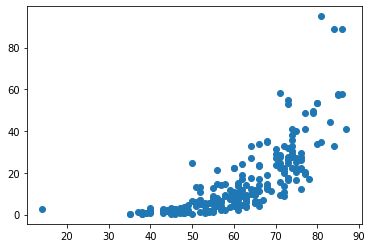

In [26]:
plt.scatter(ascvd['ETA'], ascvd["ASCVD_Score"])

(array([ 1.,  0.,  2., 15., 27., 52., 58., 34., 39., 13.]),
 array([14. , 21.3, 28.6, 35.9, 43.2, 50.5, 57.8, 65.1, 72.4, 79.7, 87. ]),
 <BarContainer object of 10 artists>)

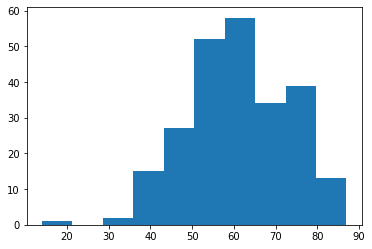

In [380]:
plt.hist(ascvd['ETA'])

In [381]:
ascvd['ETA'].describe()

count    241.000000
mean      61.124481
std       11.993447
min       14.000000
25%       53.000000
50%       61.000000
75%       71.000000
max       87.000000
Name: ETA, dtype: float64

In [27]:
ascvd['Sesso'].isnull().any()

False

<AxesSubplot:>

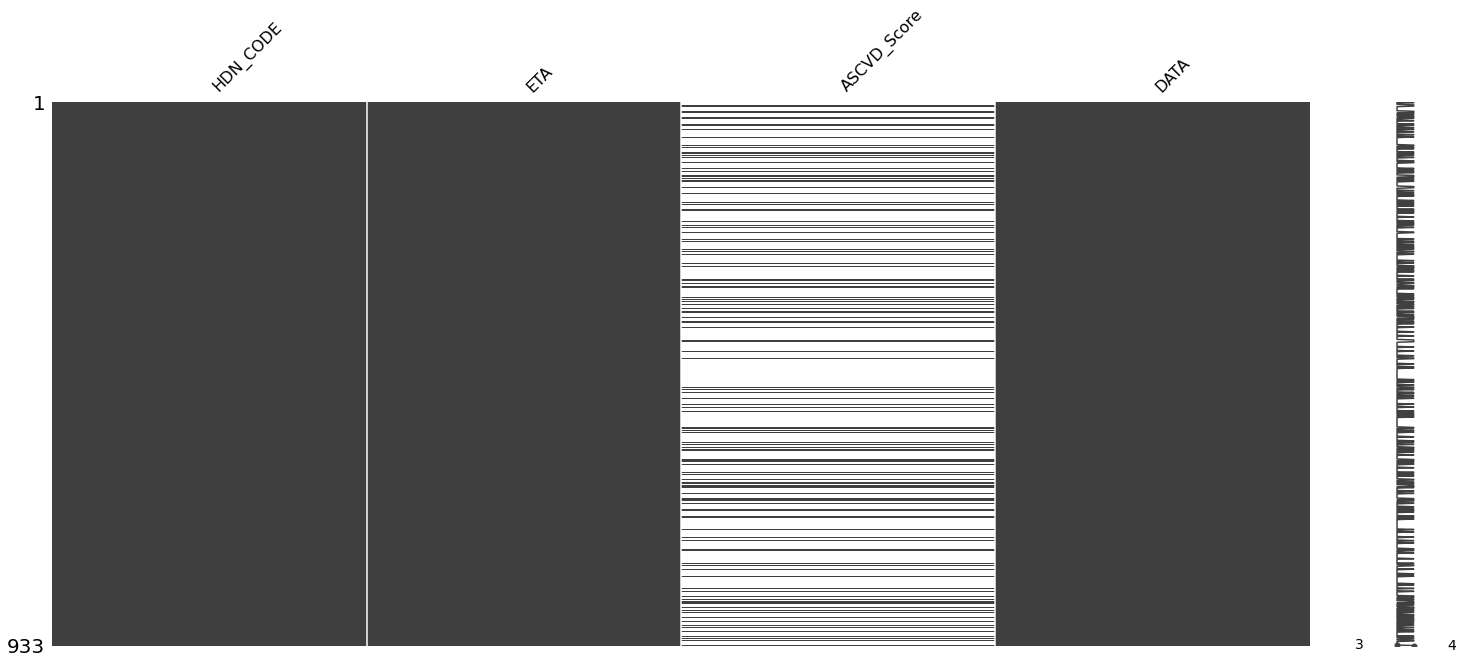

In [28]:
msno.matrix(tempo[["HDN_CODE","ETA","ASCVD_Score", "DATA"]])

In [29]:
# stampa di tutti i medici
postCovid['Estrai_Tutto']['MEDICO'].value_counts()

Giovanni Guaraldi       433
Alessia Verduri         229
Bianca Beghè            157
Vittorio Iadisernia      35
Giovanni Dolci           22
Gabriella Orlando        18
Marianna Menozzi         15
Federica Carli           14
Rossella Fogliani         4
Pierluigi Donatelli       4
Margherita Digaetano      1
Elisabetta Rovatti        1
Name: MEDICO, dtype: int64

In [30]:
# 'Bianca Beghè', 'Alessia Verduri', 'Bianca Beghé', 'Beghé Bianca', 'Elisabetta Rovatti', 'Pierluigi Donatelli'

In [31]:
postCovid['Estrai_Tutto'].groupby(['HDN_CODE', 'DATA']).head()

titolo      DNASC Sesso  IdPatientRicoveri  \
0    Diario - visita Infettivologica 1965-03-29     M              13113   
1    Diario - visita Infettivologica 1965-03-29     M              13113   
2    Diario - visita Infettivologica 1953-01-31     M                674   
3    Diario - visita Infettivologica 1953-01-31     M                674   
4    Diario - visita Infettivologica 1953-01-31     M                674   
..                               ...        ...   ...                ...   
928  Diario - visita Infettivologica 1951-12-25     M            1528073   
929  Diario - visita Infettivologica 1966-01-01     F            1644089   
930  Diario - visita Infettivologica 1978-02-13     M            1944282   
931  Diario - visita Infettivologica 1964-06-13     M            2192760   
932  Diario - visita Infettivologica 1964-06-13     M            2192760   

     HDN_CODE      HDN_DATE             MEDICO  IdAgenda  IdAppointment  \
0       13034  1.062175e+09  Gabriella Orlando  150151.0      2242905.0   
1       13034  1.062402e+09     Giovanni Dolci  150870.0      2304029.0   
2     3989181  1.062175e+09       Bianca Beghè  150151.0      2242779.0   
3     3989181  1.062175e+09  Gabriella Orlando  150153.0      2242794.0   
4     3989181  1.062499e+09  Giovanni Guaraldi  150150.0      2340733.0   
..        ...           ...                ...       ...            ...   
928   9088490  1.062209e+09   Marianna Menozzi  150153.0      2249307.0   
929    175171  1.062382e+09    Alessia Verduri  150150.0      2305662.0   
930   9262359  1.062378e+09       Bianca Beghè  150150.0      2304640.0   
931   9427171  1.062289e+09    Alessia Verduri  150151.0      2273464.0   
932   9427171  1.062292e+09  Giovanni Guaraldi  150153.0      2273469.0   

     VersioneOriginale  ...  ASCVD_gender  ASCVD_age ASCVD_race  \
0         1.062175e+09  ...           NaN        NaN        NaN   
1         1.062402e+09  ...             0       55.0     0 - WH   
2         1.062175e+09  ...           NaN        NaN        NaN   
3         1.062175e+09  ...           NaN        NaN        NaN   
4         1.062499e+09  ...             0       68.0     0 - WH   
..                 ...  ...           ...        ...        ...   
928       1.062209e+09  ...           NaN        NaN        NaN   
929       1.062382e+09  ...           NaN        NaN        NaN   
930       1.062378e+09  ...           NaN        NaN        NaN   
931       1.062289e+09  ...           NaN        NaN        NaN   
932       1.062292e+09  ...             0       56.0     0 - WH   

     ASCVD_tot_cho ASCVD_hdl_cho ASCVD_sys_bp ASCVD_treat_hyp ASCVD_diab  \
0              NaN           NaN          NaN             NaN        NaN   
1            198.0          46.0        120.0               0          0   
2              NaN           NaN          NaN             NaN        NaN   
3              NaN           NaN          NaN             NaN        NaN   
4            137.0          64.0          NaN               1          0   
..             ...           ...          ...             ...        ...   
928            NaN           NaN          NaN             NaN        NaN   
929            NaN           NaN          NaN             NaN        NaN   
930            NaN           NaN          NaN             NaN        NaN   
931            NaN           NaN          NaN             NaN        NaN   
932          156.0          68.0        114.0          1 - Si     0 - No   

    ASCVD_smoker ASCVD_Score  
0            NaN         NaN  
1              0     5,32000  
2            NaN         NaN  
3            NaN         NaN  
4              0         NaN  
..           ...         ...  
928          NaN         NaN  
929          NaN         NaN  
930          NaN         NaN  
931          NaN         NaN  
932            0     3,42000  

[933 rows x 137 columns]

## Table 1

In [32]:
# il nostro max valore è 10, però il valore massimo teorico è 37
postCovid["Table1"]["Charston_Totale"].describe()

count    354.000000
mean       2.107345
std        1.887728
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: Charston_Totale, dtype: float64

In [33]:
charlson = postCovid['Table1']

In [34]:
# mettere le età già calcolate nella tabella
charlson=pd.merge(charlson,postCovid['Estrai_Tutto'][["HDN_CODE","ETA"]].drop_duplicates(["HDN_CODE"]),left_on="hdn_code",right_on="HDN_CODE")

In [35]:
charlson.drop(columns=['HDN_CODE','Eta'], inplace=True)

In [36]:
# c'è per tutti il valore
charlson['Charston_Totale'].isnull().values.any()

False

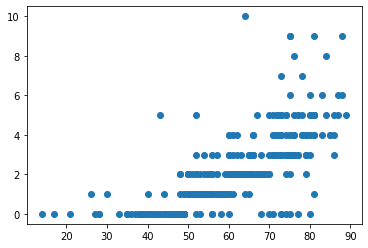

In [37]:
plt.scatter(charlson['ETA'], charlson['Charston_Totale'])

In [38]:
charlson['Charston_Diabete'].value_counts()

0 = No                                 289
1 = Senza complicazioni                 46
2 = Con danneggiamento degli organi      8
Name: Charston_Diabete, dtype: int64

In [39]:
# 11 nulli su 343 = 
charlson['Charston_Diabete'].isna().sum()

11

In [40]:
charlson['Charston_Totale'].isna().sum()

0

In [41]:
copiacharlson = charlson.filter(regex='Charston.*').copy()
copiacharlson.drop(columns=['Charston_Totale'])

Charston_AIDS Charston_CardiopatiaIschemica Charston_Cerebrovascolari  \
0          0 = No                           NaN                    0 = No   
1          0 = No                           NaN                    0 = No   
2          0 = No                           NaN                    0 = No   
3          0 = No                        0 = No                    0 = No   
4          0 = No                        0 = No                    0 = No   
..            ...                           ...                       ...   
349        0 = No                        0 = No                    0 = No   
350        0 = No                           NaN                    0 = No   
351        0 = No                           NaN                    0 = No   
352        0 = No                           NaN                    0 = No   
353        0 = No                           NaN                    0 = No   

    Charston_Connettivo Charston_Demenza         Charston_Diabete  \
0                0 = No              NaN  1 = Senza complicazioni   
1                0 = No              NaN                   0 = No   
2                0 = No              NaN                   0 = No   
3                0 = No           0 = No                   0 = No   
4                0 = No           0 = No                   0 = No   
..                  ...              ...                      ...   
349              0 = No           0 = No                   0 = No   
350              0 = No              NaN                   0 = No   
351              0 = No              NaN                   0 = No   
352              0 = No              NaN                   0 = No   
353              0 = No              NaN                   0 = No   

    Charston_Ematologiche Charston_Emiplegia Charston_Eta Charston_Fegato  \
0                 0  = No                NaN    1 (50-59)          0 = No   
1                 0  = No                NaN    3 (70-79)          0 = No   
2                 0  = No                NaN    3 (70-79)          0 = No   
3                 0  = No             0 = No     0 (< 50)          0 = No   
4                 0  = No             0 = No     0 (< 50)          0 = No   
..                    ...                ...          ...             ...   
349               0  = No             0 = No     0 (< 50)          0 = No   
350               0  = No                NaN    3 (70-79)          0 = No   
351               0  = No                NaN    1 (50-59)          0 = No   
352               0  = No                NaN          NaN          0 = No   
353               0  = No                NaN     0 (< 50)          0 = No   

     Charston_FegatoLievi Charston_InsufCardio Charston_Polmonari  \
0                     NaN               0 = No             0 = No   
1                     NaN               0 = No             0 = No   
2                     NaN               0 = No             0 = No   
3                     NaN               0 = No             0 = No   
4                     NaN               0 = No             0 = No   
..                    ...                  ...                ...   
349                   NaN               0 = No             0 = No   
350                   NaN               0 = No             0 = No   
351                   NaN               0 = No             0 = No   
352                   NaN               0 = No             0 = No   
353                   NaN               0 = No             0 = No   

    Charston_Renali Charston_Tumore Charston_UlceraGastrica  \
0      0 = GFR > 30          0 = No                 0  = No   
1      0 = GFR > 30          0 = No                 0  = No   
2      0 = GFR > 30          0 = No                 0  = No   
3            0 = No          0 = No                 0  = No   
4            0 = No          0 = No                 0  = No   
..              ...             ...                     ...   
349          0 = No          0 = No                 0  

In [42]:
def eta_to_charlson(eta):
    if eta < 50:
        return 0
    elif eta < 60:
        return 1
    elif eta < 70:
        return 2
    elif eta < 80:
        return 3
    else:
        return 4

In [43]:
copiacharlson.loc[:, 'Charlson_Eta_Loc'] = charlson['ETA'].apply(eta_to_charlson)

In [44]:
copiacharlson['Charlson_Eta_Loc']

0      1
1      3
2      3
3      0
4      0
      ..
349    0
350    4
351    1
352    2
353    0
Name: Charlson_Eta_Loc, Length: 354, dtype: int64

In [45]:
copiacharlson.loc[charlson['Charston_Eta'].isna(), 'Charston_Totale'] = copiacharlson['Charston_Totale'].astype(int) + copiacharlson['Charlson_Eta_Loc'].astype(int)

In [46]:
charlson['Charston_Totale_Ricalcolato'] = copiacharlson['Charston_Totale']

In [47]:
# i cambiamenti avvengono solo su 27 persone
(charlson['Charston_Totale_Ricalcolato'] - charlson['Charston_Totale']).value_counts()

0    327
3     10
2      9
1      5
4      3
dtype: int64

## Table 2

In [48]:
stif = postCovid['Table2']

In [49]:
stif.drop(columns=['ETA'], inplace=True)

In [50]:
stif = pd.merge(stif, postCovid['Estrai_Tutto'][["HDN_CODE","ETA"]].drop_duplicates(["HDN_CODE"]), left_on='HDN_CODE', right_on='HDN_CODE')

In [51]:
stif.shape

(319, 21)

In [52]:
stif.head()

Titolo  HDN_CODE      HDN_DATE  ESENZIONE  contatore  IdAgenda  \
0  Fibroscan   1012574  1.062362e+09        NaN        122       NaN   
1  Fibroscan   1116571  1.062188e+09        NaN         20       NaN   
2  Fibroscan   1129826  1.062267e+09        NaN         81       NaN   
3  Fibroscan   1170081  1.062392e+09        NaN        139       NaN   
4  Fibroscan   1188309  1.062523e+09        NaN        265       NaN   

   IdAppointment  FirmaMedRef  FirmaMedRefSpec                 DATA  ...  \
0            NaN          NaN              NaN  20/11/2020 00:00:00  ...   
1            NaN          NaN              NaN  22/07/2020 00:00:00  ...   
2            NaN          NaN              NaN  15/09/2020 00:00:00  ...   
3            NaN          NaN              NaN  11/12/2020 00:00:00  ...   
4            NaN          NaN              NaN  12/03/2021 00:00:00  ...   

     CAP  IQR  IQRCAP  IQR_PERC  FRIBROSIS STEATOSIS NOTE  MedicoRiferimento  \
0  187.0  0.5    29.0     10.20      F0-F1        S0  NaN  Giovanni Guaraldi   
1  261.0  1.3    26.0     20.63      F0-F1        S1  NaN  Giovanni Guaraldi   
2  286.0  1.3    17.0     25.00      F0-F1        S3  NaN  Giovanni Guaraldi   
3  218.0  0.8    39.0     15.09      F0-F1        S0  NaN  Giovanni Guaraldi   
4  239.0  1.1    19.0     23.91      F0-F1        S0  NaN  Giovanni Guaraldi   

  SpecialitaRiferimento  ETA  
0                   NaN   24  
1                   NaN   54  
2                   NaN   79  
3                   NaN   44  
4                   NaN   49  

[5 rows x 21 columns]

In [53]:
stif['Stifness'].isnull().values.any()

True

In [54]:
stif['Stifness'].isnull().value_counts()

False    315
True       4
Name: Stifness, dtype: int64

In [55]:
# usiamo la funzione replace() di pandas con un dizionario ben definito
fibrosis_dict = {'F0-F1':1,
                 'F1-F2':2,
                 'F2-F3':3,
                 'F4':4}

In [56]:
stif['FRIBROSIS'].replace(fibrosis_dict, inplace=True)

In [57]:
stif['FRIBROSIS'].value_counts()

1.0    253
3.0     48
4.0     12
Name: FRIBROSIS, dtype: int64

In [58]:
# faccio la stessa cosa che con la fibrosi
stif['STEATOSIS'].value_counts()

S0    166
S3     92
S1     37
S2     20
Name: STEATOSIS, dtype: int64

In [59]:
steatosis_dict = {'S0':1,
                 'S1':2,
                 'S2':3,
                 'S3':4}

In [60]:
stif['STEATOSIS'].replace(steatosis_dict, inplace=True)

In [61]:
stif.head()

Titolo  HDN_CODE      HDN_DATE  ESENZIONE  contatore  IdAgenda  \
0  Fibroscan   1012574  1.062362e+09        NaN        122       NaN   
1  Fibroscan   1116571  1.062188e+09        NaN         20       NaN   
2  Fibroscan   1129826  1.062267e+09        NaN         81       NaN   
3  Fibroscan   1170081  1.062392e+09        NaN        139       NaN   
4  Fibroscan   1188309  1.062523e+09        NaN        265       NaN   

   IdAppointment  FirmaMedRef  FirmaMedRefSpec                 DATA  ...  \
0            NaN          NaN              NaN  20/11/2020 00:00:00  ...   
1            NaN          NaN              NaN  22/07/2020 00:00:00  ...   
2            NaN          NaN              NaN  15/09/2020 00:00:00  ...   
3            NaN          NaN              NaN  11/12/2020 00:00:00  ...   
4            NaN          NaN              NaN  12/03/2021 00:00:00  ...   

     CAP  IQR  IQRCAP  IQR_PERC  FRIBROSIS  STEATOSIS  NOTE  \
0  187.0  0.5    29.0     10.20        1.0        1.0   NaN   
1  261.0  1.3    26.0     20.63        1.0        2.0   NaN   
2  286.0  1.3    17.0     25.00        1.0        4.0   NaN   
3  218.0  0.8    39.0     15.09        1.0        1.0   NaN   
4  239.0  1.1    19.0     23.91        1.0        1.0   NaN   

   MedicoRiferimento SpecialitaRiferimento  ETA  
0  Giovanni Guaraldi                   NaN   24  
1  Giovanni Guaraldi                   NaN   54  
2  Giovanni Guaraldi                   NaN   79  
3  Giovanni Guaraldi                   NaN   44  
4  Giovanni Guaraldi                   NaN   49  

[5 rows x 21 columns]

In [62]:
stif['CAP'].describe()

count    315.000000
mean     255.460317
std       53.455448
min      100.000000
25%      220.000000
50%      246.000000
75%      292.000000
max      400.000000
Name: CAP, dtype: float64

In [63]:
stif['CAP'].isna().value_counts()

False    315
True       4
Name: CAP, dtype: int64

In [64]:
stif.groupby('HDN_CODE')['HDN_CODE'].count().value_counts()

1    255
2     32
Name: HDN_CODE, dtype: int64

## Table 3

In [65]:
frailty = postCovid['Table3']

In [66]:
# colonna con valori NaN, è la variabile di outcome, va da 0 a 5
frailty['FrailtyPhenotype']

0      2.0
1      1.0
2      3.0
3      2.0
4      NaN
      ... 
472    2.0
473    NaN
474    2.0
475    NaN
476    1.0
Name: FrailtyPhenotype, Length: 477, dtype: float64

In [67]:
frailty['FrailtyPhenotype'].value_counts()

2.0    107
1.0     94
3.0     59
4.0     29
0.0     27
5.0      5
Name: FrailtyPhenotype, dtype: int64

In [68]:
frailty = pd.merge(frailty, postCovid['Estrai_Tutto'][["HDN_CODE"]].drop_duplicates(["HDN_CODE"]), left_on='hdn_code', right_on='HDN_CODE')

In [69]:
# tolgo il codice hdn duplicato e tengo solo quello della tabella "Estrai_Tutto"
frailty = frailty.drop(columns=['hdn_code'])

In [70]:
# abbiamo solo 321 valori non nulli
frailty['FrailtyPhenotype'].describe()

count    321.000000
mean       1.950156
std        1.147283
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: FrailtyPhenotype, dtype: float64

In [71]:
# alcuni hanno fatto più visite, anche se molte sono vuote
frailty['HDN_CODE'].value_counts()

3974562    3
4050960    3
6583675    3
7012370    3
26530      3
          ..
7217584    1
5173247    1
5049872    1
4347075    1
3916799    1
Name: HDN_CODE, Length: 375, dtype: int64

In [72]:
prova = frailty.dropna(subset=['FrailtyPhenotype'])

In [73]:
# togliendo i phenotype nulli, rimangono pazienti con più di una visita
prova['HDN_CODE'].value_counts()

3974562    2
3948522    2
3822676    2
9150891    2
3964856    2
          ..
2236       1
9146388    1
4194496    1
4347075    1
3916799    1
Name: HDN_CODE, Length: 299, dtype: int64

In [74]:
# 22 persone hanno visite con fenotipi che cambiano da una visita all'altra
prova.groupby(['HDN_CODE'])['FrailtyPhenotype'].count().value_counts()

1    277
2     22
Name: FrailtyPhenotype, dtype: int64

In [75]:
prova['Mano_dx'].value_counts()

0.0     16
24.5     5
29.2     5
28.0     5
27.0     4
        ..
42.3     1
23.8     1
12.0     1
31.1     1
19.7     1
Name: Mano_dx, Length: 195, dtype: int64

In [76]:
prova['Mano_sx'].value_counts()

0.0     15
31.1     5
24.4     4
30.6     4
15.3     4
        ..
19.0     1
24.7     1
43.3     1
35.6     1
15.2     1
Name: Mano_sx, Length: 207, dtype: int64

In [77]:
# tolgo i valori che sono 0 nelle prove
prova['Mano_dx'].replace(0, np.nan, inplace=True)
prova['Mano_sx'].replace(0, np.nan, inplace=True)

/home/gibbo/.local/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [78]:
prova['Mano_dx'].describe()

count    305.000000
mean      26.338033
std        8.568209
min        4.400000
25%       20.900000
50%       26.800000
75%       32.100000
max       45.800000
Name: Mano_dx, dtype: float64

In [79]:
prova['Mano_sx'].describe()

count    306.000000
mean      25.393464
std        9.008191
min        3.500000
25%       18.850000
50%       25.550000
75%       31.275000
max       68.600000
Name: Mano_sx, dtype: float64

In [80]:
# modifico i valori della mano dominante
prova['ManoDominante'].replace({'1=destra':1, '2=sinistra':2, '3=ambidestro':3}, inplace=True)

In [81]:
prova['ManoDominante'].value_counts()

1.0    280
3.0     15
2.0     13
Name: ManoDominante, dtype: int64

In [82]:
# controllo lo ScoreFinale per la SPPB
prova['ScoreFinale'].value_counts()

12.0    105
11.0     83
10.0     50
9.0      20
8.0      18
7.0      16
6.0       5
4.0       4
3.0       3
0.0       1
5.0       1
Name: ScoreFinale, dtype: int64

In [83]:
prova['FareSportIntensi'].value_counts()

1= Si, senza Limitazioni                129
2= No, con limitazioni lievi             99
3= No, con limitazioni significative     80
No                                        1
Name: FareSportIntensi, dtype: int64

In [84]:
prova['CaloPesoInvolontario'].value_counts()

Si    220
No     99
Name: CaloPesoInvolontario, dtype: int64

In [85]:
prova['CaloPesoInvolontario'].replace({'Si':1, 'No':0}, inplace=True)

In [86]:
prova['FareSportIntensi'].replace({'1= Si, senza Limitazioni':1,
                                   'No':None,
                                   '2= No, con limitazioni lievi':2,
                                   '3= No, con limitazioni significative':3}, inplace=True)

In [87]:
# modificata riga 332 nel file 
prova['Tempo4Metri'].astype(float)

0      3.14
1      3.10
2      3.15
3      3.67
5      3.80
       ... 
469    4.12
471    3.75
472    3.25
474    3.38
476    2.85
Name: Tempo4Metri, Length: 321, dtype: float64

In [88]:
prova['Tempo4Metri'].describe()

count    308.000000
mean       3.861201
std        1.223283
min        1.910000
25%        3.197500
50%        3.645000
75%        4.235000
max       12.680000
Name: Tempo4Metri, dtype: float64

In [89]:
prova.loc[prova['FrailtyPhenotype'] <=3, 'FrailtyPhenotypeBool'] = False
prova.loc[prova['FrailtyPhenotype'] >3, 'FrailtyPhenotypeBool'] = True

/home/gibbo/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/gibbo/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/gibbo/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [90]:
prova['FrailtyPhenotypeBool'].value_counts()

False    287
True      34
Name: FrailtyPhenotypeBool, dtype: int64

## Table4

In [91]:
pneumo = postCovid['Table4']

In [92]:
# tolgo il campo ETA duplicato
pneumo.drop(columns=['ETA'], inplace=True)

In [93]:
pneumo = pd.merge(pneumo, postCovid['Estrai_Tutto'][["HDN_CODE","ETA"]].drop_duplicates(["HDN_CODE"]), left_on='hdn_code', right_on='HDN_CODE')

In [94]:
# tolgo hdn_code duplicato
pneumo.drop(columns=['hdn_code'], inplace=True)

In [95]:
pneumo

Titolo      hdn_date  Altezza AnamnesiPatologicaRemota Atopia  \
0    Visita Pneumo  1.062559e+09      NaN                      NaN    NaN   
1    Visita Pneumo  1.062462e+09      NaN                      NaN    NaN   
2    Visita Pneumo  1.062350e+09      NaN                      NaN    NaN   
3    Visita Pneumo  1.062462e+09      NaN                      NaN    NaN   
4    Visita Pneumo  1.062391e+09      NaN                      NaN    NaN   
..             ...           ...      ...                      ...    ...   
400  Visita Pneumo  1.062248e+09      NaN                      NaN    NaN   
401  Visita Pneumo  1.062341e+09      NaN                      NaN    NaN   
402  Visita Pneumo  1.062289e+09      NaN                      NaN    NaN   
403  Visita Pneumo  1.062248e+09      NaN                      NaN    NaN   
404  Visita Pneumo  1.062351e+09      NaN                      NaN    NaN   

     BMI                 DATA EGA_Ambiente EGA_HB  EGA_O2Lt  ...  \
0    NaN  06/04/2021 00:00:00        in AA   14.1       NaN  ...   
1    NaN  28/01/2021 00:00:00        in AA   14.8       NaN  ...   
2    NaN  12/11/2020 00:00:00          NaN    NaN       NaN  ...   
3    NaN  28/01/2021 00:00:00        in AA   12.8       NaN  ...   
4    NaN  10/12/2020 00:00:00        in AA   12.8       NaN  ...   
..   ...                  ...          ...    ...       ...  ...   
400  NaN  02/09/2020 00:00:00        in AA     13       NaN  ...   
401  NaN  05/11/2020 00:00:00        in AA   11.5       NaN  ...   
402  NaN  30/09/2020 00:00:00        in AA   12.5       NaN  ...   
403  NaN  02/09/2020 00:00:00        in AA     14       NaN  ...   
404  NaN  12/11/2020 00:00:00          NaN    NaN       NaN  ...   

    TestCammino6Min_BorgBase TestCammino6Min_BorgEnd TestCammino6Min_Distanza  \
0                  2 - lieve               2 - lieve                    330.0   
1                0 - nessuna             0 - nessuna                    560.0   
2                0 - nessuna             0 - nessuna                    660.0   
3                0 - nessuna               2 - lieve                    400.0   
4                0 - nessuna             0 - nessuna                    420.0   
..                       ...                     ...                      ...   
400                      NaN                     NaN                      NaN   
401              0 - nessuna             0 - nessuna                    480.0   
402              0 - nessuna             0 - nessuna                    540.0   
403              0 - nessuna             0 - nessuna                    510.0   
404              0 - nessuna             0 - nessuna                    540.0   

    TestCammino6Min_Esito TestCammino6Min_NSoste TestCammino6Min_SpO2Base  \
0                  0 - No                    0.0                     99.0   
1                  0 - No                    0.0                     96.0   
2                  0 - No                    NaN                    100.0   
3                  0 - No                    0.0                     99.0   
4                  0 - No                    0.0                     97.0   
..                    ...                    ...                      ...   
400                   NaN                    NaN                      NaN   
401                0 - No                    NaN                     98.0   
402                0 - No                    NaN                     99.0   
403                0 - No                    NaN                    100.0   
404                0 - No                    NaN                     99.0   

    TestCammino6Min_SpO2End TestCammino6Min_SpO2Min HDN_CODE ETA  
0                      96.0                    96.0   100341  56  
1                       NaN                    97.0  1009111  45  
2                      99.0                    99.0  1012574  24  
3                      99.0                    99.0   104772  43  
4                      97.0          

In [96]:
# cosa posso farne di questi 3 da soli ?
pneumo['EGA_Ambiente'].value_counts()

in AA     339
Con O2      3
Name: EGA_Ambiente, dtype: int64

In [97]:
# direi che non si possa prendere per la troppa mancanza di dati
pneumo['EGA_O2Lt'].value_counts()

9.0     2
53.0    1
1.0     1
Name: EGA_O2Lt, dtype: int64

In [98]:
#prima trasformo tutto in stringa, converto e torno in float
pneumo['EGA_HB'] = pneumo['EGA_HB'].astype(str)
pneumo['EGA_HB'] = pneumo['EGA_HB'].apply(lambda x: x.replace(',', '.'))
pneumo['EGA_HB'] = pneumo['EGA_HB'].astype(float)

In [99]:
pneumo['EGA_HB'].describe()

count    331.000000
mean      14.114199
std        1.725568
min        5.000000
25%       13.050000
50%       14.200000
75%       15.300000
max       20.900000
Name: EGA_HB, dtype: float64

In [100]:
pneumo['EGA_HB'].isna().value_counts()

False    331
True      74
Name: EGA_HB, dtype: int64

In [101]:
#prima trasformo tutto in stringa, converto e torno in float
pneumo['EGA_PaCO2'] = pneumo['EGA_PaCO2'].astype(str)
pneumo['EGA_PaCO2'] = pneumo['EGA_PaCO2'].apply(lambda x: x.replace(',', '.'))
pneumo['EGA_PaCO2'] = pneumo['EGA_PaCO2'].astype(float)

In [102]:
pneumo['EGA_PaCO2'].describe()

count    340.000000
mean      39.684118
std        4.308678
min        6.000000
25%       37.500000
50%       40.000000
75%       42.425000
max       51.200000
Name: EGA_PaCO2, dtype: float64

In [103]:
#prima trasformo tutto in stringa, converto e torno in float
pneumo['EGA_PaO2'] = pneumo['EGA_PaO2'].astype(str)
pneumo['EGA_PaO2'] = pneumo['EGA_PaO2'].apply(lambda x: x.replace(',', '.'))
pneumo['EGA_PaO2'] = pneumo['EGA_PaO2'].astype(float)

In [104]:
pneumo['EGA_PaO2'].describe()

count    340.000000
mean      85.614118
std       11.529571
min        2.000000
25%       79.800000
50%       86.000000
75%       92.225000
max      116.000000
Name: EGA_PaO2, dtype: float64

In [105]:
pneumo['EGA_PaO2'].isna().value_counts()

False    340
True      65
Name: EGA_PaO2, dtype: int64

In [106]:
# modifico il file a riga 247 per valore "7.4314.9"
# prima trasformo tutto in stringa, converto e torno in float
pneumo['EGA_PH'] = pneumo['EGA_PH'].astype(str)
pneumo['EGA_PH'] = pneumo['EGA_PH'].apply(lambda x: x.replace(',', '.'))
pneumo['EGA_PH'] = pneumo['EGA_PH'].astype(float)

In [107]:
pneumo.loc[pneumo['EGA_PH'] > 14, 'EGA_PH'] = np.nan

In [108]:
pneumo['EGA_PH'].describe()

count    339.000000
mean       7.387779
std        0.263031
min        4.000000
25%        7.390000
50%        7.410000
75%        7.430000
max        7.490000
Name: EGA_PH, dtype: float64

In [109]:
# prima trasformo tutto in stringa, converto e torno in float
pneumo['EGA_SatO2'] = pneumo['EGA_SatO2'].astype(str)
pneumo['EGA_SatO2'] = pneumo['EGA_SatO2'].apply(lambda x: x.replace(',', '.'))
pneumo['EGA_SatO2'] = pneumo['EGA_SatO2'].astype(float)

In [110]:
pneumo.loc[pneumo['EGA_SatO2'] < 30, 'EGA_SatO2'] = np.nan

In [111]:
pneumo['EGA_SatO2'].describe()

count    358.000000
mean      96.925140
std        1.336865
min       90.900000
25%       96.300000
50%       97.050000
75%       97.900000
max      100.000000
Name: EGA_SatO2, dtype: float64

In [112]:
pneumo['EGA_SatO2'].isna().value_counts()

False    358
True      47
Name: EGA_SatO2, dtype: int64

In [113]:
# poche persone ne hanno fatte più di una
pneumo.groupby(['HDN_CODE'] )['HDN_CODE'].count().value_counts()

1    388
2      7
3      1
Name: HDN_CODE, dtype: int64

In [114]:
pneumo['Pneumo_ProveFunzResp_FEV_FVCPre'] = pneumo['Pneumo_ProveFunzResp_FEV_FVCPre'].astype(str)
pneumo['Pneumo_ProveFunzResp_FEV_FVCPre'] = pneumo['Pneumo_ProveFunzResp_FEV_FVCPre'].apply(lambda x: x.replace(',', '.'))
pneumo['Pneumo_ProveFunzResp_FEV_FVCPre'] = pneumo['Pneumo_ProveFunzResp_FEV_FVCPre'].astype(float)

In [115]:
pneumo['Pneumo_ProveFunzResp_FEV_FVCPre'].describe()

count    387.000000
mean      79.718140
std       10.591344
min        6.000000
25%       76.170000
50%       81.030000
75%       84.790000
max      116.000000
Name: Pneumo_ProveFunzResp_FEV_FVCPre, dtype: float64

In [116]:
pneumo['Pneumo_ProveFunzResp_FEV_FVCPre'].isna().value_counts()

False    387
True      18
Name: Pneumo_ProveFunzResp_FEV_FVCPre, dtype: int64

In [117]:
pneumo['Pneumo_ProveFunzResp_MEP'] = pneumo['Pneumo_ProveFunzResp_MEP'].astype(str)
pneumo['Pneumo_ProveFunzResp_MEP'] = pneumo['Pneumo_ProveFunzResp_MEP'].apply(lambda x: x.replace(',', '.'))
pneumo['Pneumo_ProveFunzResp_MEP'].replace('na', np.nan, inplace=True);
pneumo['Pneumo_ProveFunzResp_MEP'].replace('n', '',inplace=True)
pneumo['Pneumo_ProveFunzResp_MEP'] = pneumo['Pneumo_ProveFunzResp_MEP'].astype(float)

In [118]:
pneumo['Pneumo_ProveFunzResp_MEP'].describe()

count    346.000000
mean      74.745636
std       31.556039
min        5.640000
25%       58.250000
50%       76.000000
75%       93.000000
max      173.000000
Name: Pneumo_ProveFunzResp_MEP, dtype: float64

In [119]:
pneumo['Pneumo_ProveFunzResp_MEP'].isna().value_counts()

False    346
True      59
Name: Pneumo_ProveFunzResp_MEP, dtype: int64

In [120]:
pneumo['Pneumo_ProveFunzResp_MIP'] = pneumo['Pneumo_ProveFunzResp_MIP'].astype(str)
pneumo['Pneumo_ProveFunzResp_MIP'] = pneumo['Pneumo_ProveFunzResp_MIP'].apply(lambda x: x.replace(',', '.'))
pneumo['Pneumo_ProveFunzResp_MIP'] = pneumo['Pneumo_ProveFunzResp_MIP'].astype(float)

In [121]:
pneumo['Pneumo_ProveFunzResp_MIP'].describe()

count    348.000000
mean      79.923132
std       35.708361
min        2.270000
25%       61.000000
50%       81.500000
75%       99.000000
max      199.000000
Name: Pneumo_ProveFunzResp_MIP, dtype: float64

In [122]:
pneumo['Pneumo_ProveFunzResp_MIP'].isna().value_counts()

False    348
True      57
Name: Pneumo_ProveFunzResp_MIP, dtype: int64

In [123]:
# valori in scala, si potrebbe fare una sostituzione volendo
pneumo['Pneumo_ScalaBorg'].value_counts()

0 - nessuna                253
2 - lieve                   42
0,5 - molto molto lieve     28
1 - molto lieve             27
3 - moderata                18
4 - piuttosto intensa        3
5 - intensa                  2
Name: Pneumo_ScalaBorg, dtype: int64

In [124]:
pneumo['Pneumo_ScalaBorg'].isna().value_counts()

False    373
True      32
Name: Pneumo_ScalaBorg, dtype: int64

In [125]:
# qui la maggior parte delle persione ha ottenuto "nessuna"
pneumo['TestCammino6Min_BorgBase'].value_counts()

0 - nessuna                354
2 - lieve                    5
3 - moderata                 5
1 - molto lieve              4
0,5 - molto molto lieve      3
4 - piuttosto intensa        1
5 - intensa                  1
Name: TestCammino6Min_BorgBase, dtype: int64

In [126]:
pneumo['TestCammino6Min_BorgBase'].isna().value_counts()

False    373
True      32
Name: TestCammino6Min_BorgBase, dtype: int64

In [127]:
# qui abbiamo dati già diversi rispetto a prima, anche più interessanti. 
# come tratto il 6 ?
pneumo['TestCammino6Min_BorgEnd'].value_counts()

0 - nessuna                260
2 - lieve                   31
1 - molto lieve             21
3 - moderata                15
0,5 - molto molto lieve     13
5 - intensa                 12
4 - piuttosto intensa       10
7 - molto intensa            6
6 -                          6
Name: TestCammino6Min_BorgEnd, dtype: int64

In [128]:
pneumo['TestCammino6Min_BorgEnd'].isna().value_counts()

False    374
True      31
Name: TestCammino6Min_BorgEnd, dtype: int64

In [129]:
pneumo['TestCammino6Min_Distanza'].describe()

count    349.000000
mean     454.876791
std       79.690235
min       90.000000
25%      400.000000
50%      460.000000
75%      500.000000
max      660.000000
Name: TestCammino6Min_Distanza, dtype: float64

In [130]:
pneumo['TestCammino6Min_Distanza'].isna().value_counts()

False    349
True      56
Name: TestCammino6Min_Distanza, dtype: int64

## Table 6

In [131]:
valori = postCovid['Table6']

In [132]:
valori = pd.merge(valori, postCovid['Estrai_Tutto'][["HDN_CODE"]].drop_duplicates(["HDN_CODE"]), left_on='hdn_code', right_on='HDN_CODE')

In [133]:
valori.drop(columns=['hdn_code'], inplace=True)0

In [134]:
valori.head()

Titolo      hdn_date  Admissioncode  \
0  Segni e sintomi - Epicrisi  1.062473e+09            NaN   
1  Segni e sintomi - Epicrisi  1.062362e+09            NaN   
2  Segni e sintomi - Epicrisi  1.062473e+09            NaN   
3  Segni e sintomi - Epicrisi  1.062453e+09            NaN   
4  Segni e sintomi - Epicrisi  1.062188e+09            NaN   

                 Alcool  altezza AltriSintomi AltriSintomi_Post  \
0  1 porzione al giorno    182.0           No                No   
1                     3    172.0           No                No   
2                   mai    169.0           No                No   
3                   NaN    152.0           No                No   
4                     0    176.0           No                No   

  AltriSintomi_Testo Altro Atopia  ...  Tosse_Quando_Parlo_Manca_Fiato  \
0                NaN   NaN     No  ...                             NaN   
1                NaN   NaN     No  ...                             NaN   
2                NaN   NaN     No  ...                             NaN   
3                NaN   NaN    NaN  ...                             NaN   
4                NaN   NaN    NaN  ...                              No   

   Tosse_Quando_Tossisco_SentoDolore  Tosse_Respiro_Disturba_Sonno  \
0                                NaN                           NaN   
1                                NaN                           NaN   
2                                NaN                           NaN   
3                                NaN                           NaN   
4                                 No                            No   

  Tosse_Tossire_Stanca_Fisicamente  Uso_O2_Reservoirs Uso_Ossigeno  \
0                              NaN                NaN          NaN   
1                              NaN                NaN          NaN   
2                              NaN                NaN          NaN   
3                              NaN                NaN          NaN   
4                               No                NaN          NaN   

   ValidazioneData  ValidazioneUtente  VitaCm HDN_CODE  
0              NaN                NaN   102.0  1009111  
1              NaN                NaN    73.0  1012574  
2              NaN                NaN    83.0   104772  
3              NaN                NaN    91.0  1106211  
4              NaN                NaN    86.0  1116571  

[5 rows x 171 columns]

In [135]:
# qui ci sono più seconde visite
valori.groupby(['HDN_CODE'])['HDN_CODE'].count().value_counts()

1    319
2     55
3     12
Name: HDN_CODE, dtype: int64

In [136]:
# correzione su file di riga 65 (era 4152) e riga 457 (era 4170)
valori['altezza'].describe()

count    452.000000
mean     169.168142
std        9.311465
min      142.000000
25%      162.000000
50%      170.000000
75%      176.000000
max      194.000000
Name: altezza, dtype: float64

In [137]:
# valori troppo sballati, guardare tabella 9
valori['Alcool'].describe()

count     404
unique    114
top         0
freq       74
Name: Alcool, dtype: object

In [138]:
valori['Alcool'].isna().value_counts()

False    404
True      61
Name: Alcool, dtype: int64

In [139]:
# pulizia forzata
valori.loc[valori['Alcool'] == "0",'Alcool'] = False
valori.loc[valori['Alcool'].str.contains("(?i)mai")==True,'Alcool'] = False
valori.loc[valori['Alcool'].str.contains("(?i)no")==True,'Alcool'] = False
valori.loc[valori['Alcool'].str.contains("(?i)nessuno")==True,'Alcool'] = False
valori.loc[(valori['Alcool'] != False) & (valori['Alcool'].notna()), 'Alcool'] = True

In [140]:
valori['Alcool'].value_counts()

True     206
False    198
Name: Alcool, dtype: int64

In [141]:
# i valori di peso sono da trasformare in float
valori['Peso'] = valori['Peso'].astype(str)
valori['Peso'] = valori['Peso'].apply(lambda x: x.replace(',', '.'))
valori['Peso'] = valori['Peso'].astype(float)

In [142]:
valori['Peso'].describe()

count    454.000000
mean      83.014537
std       16.705002
min       38.000000
25%       72.000000
50%       82.250000
75%       93.000000
max      162.000000
Name: Peso, dtype: float64

In [143]:
# tolgo i valori inutili da qui
valori['PesoPostRicovero'].replace('non sa', None, inplace=True)

In [144]:
valori['PesoPostRicovero'] = valori['PesoPostRicovero'].astype(str)
valori['PesoPostRicovero'] = valori['PesoPostRicovero'].apply(lambda x: x.replace(',', '.'))
valori['PesoPostRicovero'] = valori['PesoPostRicovero'].astype(float)

In [145]:
valori['PesoPostRicovero'].describe()

count    429.000000
mean      77.934732
std       16.453252
min        8.000000
25%       68.000000
50%       77.000000
75%       88.000000
max      135.000000
Name: PesoPostRicovero, dtype: float64

In [146]:
valori['PesoPreRicovero'].replace('non sa', None, inplace=True)
valori['PesoPreRicovero'] = valori['PesoPreRicovero'].astype(str)
valori['PesoPreRicovero'] = valori['PesoPreRicovero'].apply(lambda x: x.replace(',', '.'))
valori['PesoPreRicovero'] = valori['PesoPreRicovero'].astype(float)

In [147]:
valori['PesoPreRicovero'].describe()

count    439.000000
mean      85.066059
std       18.203102
min       38.000000
25%       73.000000
50%       84.000000
75%       95.000000
max      194.000000
Name: PesoPreRicovero, dtype: float64

In [148]:
# tolgo i valori inutili da qui
valori['PesoPreRicovero'].replace('non sa', None, inplace=True)

In [149]:
# valori massimi un po' strani ?
valori['BMI'].describe()

count    452.000000
mean      28.887135
std        5.488769
min        0.040000
25%       25.390000
50%       28.410000
75%       31.895000
max       61.730000
Name: BMI, dtype: float64

In [150]:
valori['BMI'].isna().value_counts()

False    452
True      13
Name: BMI, dtype: int64

In [151]:
valori['BMI_Ricovero'].describe()

count    437.000000
mean      29.240323
std        6.479454
min        0.000000
25%       25.400000
50%       29.050000
75%       32.660000
max       57.300000
Name: BMI_Ricovero, dtype: float64

In [152]:
valori['BMI_Ricovero'].isna().value_counts()

False    437
True      28
Name: BMI_Ricovero, dtype: int64

In [153]:
valori['BMIPostRicovero'].describe()

count    428.000000
mean      26.651061
std        6.351017
min        0.000000
25%       23.432500
50%       26.545000
75%       29.995000
max       46.380000
Name: BMIPostRicovero, dtype: float64

In [154]:
valori['BMIPostRicovero'].isna().value_counts()

False    428
True      37
Name: BMIPostRicovero, dtype: int64

In [155]:
valori['Dispnea'].value_counts()

No    311
Si    127
Name: Dispnea, dtype: int64

In [156]:
valori['Dispnea'].replace({'Si':1, 'No':0}, inplace=True)

In [157]:
valori['Dispnea'].value_counts()

0.0    311
1.0    127
Name: Dispnea, dtype: int64

In [158]:
# la saturazione qui non so quanto sia affidabile
valori['Saturazione'].describe()

count    182.000000
mean      97.043956
std        2.970991
min       74.000000
25%       97.000000
50%       98.000000
75%       98.000000
max      100.000000
Name: Saturazione, dtype: float64

In [159]:
valori['VitaCm'].describe()

count    422.000000
mean     102.526066
std       13.748091
min       63.000000
25%       93.000000
50%      102.000000
75%      112.000000
max      140.000000
Name: VitaCm, dtype: float64

In [160]:
valori['Fumatore'].value_counts()

No             249
Ex fumatore    183
Si              20
Name: Fumatore, dtype: int64

In [161]:
valori['Fumatore'].replace({'No':0,
                            'Ex fumatore':1,
                            'Si':2}, inplace=True)

In [162]:
valori['Fumatore'].value_counts()

0.0    249
1.0    183
2.0     20
Name: Fumatore, dtype: int64

In [163]:
valori.loc[valori['Fumatore']<=1,'Fumatore'] = False

In [164]:
valori.loc[valori['Fumatore']==2,'Fumatore'] = True

In [165]:
valori['Fumatore'].value_counts()

False    432
True      20
Name: Fumatore, dtype: int64

In [166]:
valori['Fumatore'].isna().value_counts()

False    452
True      13
Name: Fumatore, dtype: int64

In [167]:
# questi valori sono molto pochi
valori['Frequenza_Respiratoria'].describe()

count    126.000000
mean      23.833333
std       72.255962
min       10.000000
25%       14.000000
50%       16.000000
75%       16.000000
max      810.000000
Name: Frequenza_Respiratoria, dtype: float64

In [168]:
# sopra i 100 respiri al minuto è difficile arrivare
valori.loc[valori['Frequenza_Respiratoria'] > 100, 'Frequenza_Respiratoria'] = np.nan

In [169]:
# questi valori sono molto pochi
valori['Frequenza_Respiratoria'].describe()

count    124.000000
mean      16.540323
std       10.668241
min       10.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       98.000000
Name: Frequenza_Respiratoria, dtype: float64

In [170]:
# numero di pacchetti all'anno per chi fuma
valori['Pack_years'].describe()

count    219.000000
mean      15.858447
std       19.125924
min        0.000000
25%        0.000000
50%       10.000000
75%       25.000000
max       90.000000
Name: Pack_years, dtype: float64

In [171]:
# la maggior parte sono a no, volendo posso sostituire con T/F
valori['Sintomi_Cadute'].value_counts()

No    409
Si     16
Name: Sintomi_Cadute, dtype: int64

In [172]:
valori['Sintomi_Cadute'].replace({'Si':True, 'No':False}, inplace=True)

In [173]:
valori['Sintomi_Cadute'].isna().value_counts()

False    425
True      40
Name: Sintomi_Cadute, dtype: int64

In [174]:
valori['Sintomi_DifficoltaDeglutizione'].value_counts()

No    322
Si     30
Name: Sintomi_DifficoltaDeglutizione, dtype: int64

In [175]:
valori['Sintomi_DifficoltaDeglutizione'].replace({'Si':True, 'No':False}, inplace=True)

In [176]:
valori['Sintomi_DifficoltaDeglutizione'].isna().value_counts()

False    352
True     113
Name: Sintomi_DifficoltaDeglutizione, dtype: int64

In [177]:
valori['Sintomi_DistUdito'].value_counts()

No    339
Si     60
Name: Sintomi_DistUdito, dtype: int64

In [178]:
valori['Sintomi_DistUdito'].replace({'Si':True, 'No':False}, inplace=True)

In [179]:
valori['Sintomi_DistUdito'].isna().value_counts()

False    399
True      66
Name: Sintomi_DistUdito, dtype: int64

In [180]:
valori['Sintomi_DistVista'].value_counts()

No    336
Si     63
Name: Sintomi_DistVista, dtype: int64

In [181]:
valori['Sintomi_DistVista'].replace({'Si':True, 'No':False}, inplace=True)

In [182]:
valori['Sintomi_DistVista'].isna().value_counts()

False    399
True      66
Name: Sintomi_DistVista, dtype: int64

In [183]:
valori['SintomiNeuropsico_Ageusia'].value_counts()

No    392
Si     36
Name: SintomiNeuropsico_Ageusia, dtype: int64

In [184]:
valori['SintomiNeuropsico_Ageusia'].replace({'Si':True, 'No':False}, inplace=True)

In [185]:
valori['SintomiNeuropsico_Ageusia'].isna().value_counts()

False    428
True      37
Name: SintomiNeuropsico_Ageusia, dtype: int64

In [186]:
valori['SintomiNeuropsico_Anosmia'].value_counts()

No    390
Si     38
Name: SintomiNeuropsico_Anosmia, dtype: int64

In [187]:
valori['SintomiNeuropsico_Anosmia'].replace({'Si':True, 'No':False}, inplace=True)

In [188]:
valori['SintomiNeuropsico_Anosmia'].isna().value_counts()

False    428
True      37
Name: SintomiNeuropsico_Anosmia, dtype: int64

In [189]:
# ne soffrono molti di più
valori['SintomiNeuropsico_Astenia'].value_counts()

No    268
Si    174
Name: SintomiNeuropsico_Astenia, dtype: int64

In [190]:
valori['SintomiNeuropsico_Astenia'].replace({'Si':True, 'No':False}, inplace=True)

In [191]:
valori['SintomiNeuropsico_Astenia'].isna().value_counts()

False    442
True      23
Name: SintomiNeuropsico_Astenia, dtype: int64

In [192]:
valori['SintomiNeuropsico_CognitivoAttenzione'].value_counts()

No    344
Si     83
Name: SintomiNeuropsico_CognitivoAttenzione, dtype: int64

In [193]:
valori['SintomiNeuropsico_CognitivoAttenzione'].replace({'Si':True, 'No':False}, inplace=True)

In [194]:
valori['SintomiNeuropsico_CognitivoAttenzione'].isna().value_counts()

False    427
True      38
Name: SintomiNeuropsico_CognitivoAttenzione, dtype: int64

In [195]:
valori['SintomiNeuropsico_CognitivoConcentrazione'].value_counts()

No    319
Si    108
Name: SintomiNeuropsico_CognitivoConcentrazione, dtype: int64

In [196]:
valori['SintomiNeuropsico_CognitivoConcentrazione'].replace({'Si':True, 'No':False}, inplace=True)

In [197]:
valori['SintomiNeuropsico_CognitivoConcentrazione'].isna().value_counts()

False    427
True      38
Name: SintomiNeuropsico_CognitivoConcentrazione, dtype: int64

In [198]:
# anche qui ne soffrono parecchi
valori['SintomiNeuropsico_CognitivoMemoria'].value_counts()

No    301
Si    139
Name: SintomiNeuropsico_CognitivoMemoria, dtype: int64

In [199]:
valori['SintomiNeuropsico_CognitivoMemoria'].replace({'Si':True, 'No':False}, inplace=True)

In [200]:
valori['SintomiNeuropsico_CognitivoMemoria'].isna().value_counts()

False    440
True      25
Name: SintomiNeuropsico_CognitivoMemoria, dtype: int64

In [201]:
valori['SintomiNeuropsico_DistEquilibrio'].value_counts()

No    355
Si     76
Name: SintomiNeuropsico_DistEquilibrio, dtype: int64

In [202]:
valori['SintomiNeuropsico_DistEquilibrio'].replace({'Si':True, 'No':False}, inplace=True)

In [203]:
valori['SintomiNeuropsico_DistEquilibrio'].isna().value_counts()

False    431
True      34
Name: SintomiNeuropsico_DistEquilibrio, dtype: int64

In [204]:
# sintomo diffuso
valori['SintomiNeuropsico_DistSonno'].value_counts()

No    288
Si    151
Name: SintomiNeuropsico_DistSonno, dtype: int64

In [205]:
valori['SintomiNeuropsico_DistSonno'].replace({'Si':True, 'No':False}, inplace=True)

In [206]:
valori['SintomiNeuropsico_DistSonno'].isna().value_counts()

False    439
True      26
Name: SintomiNeuropsico_DistSonno, dtype: int64

In [207]:
# anche questo è comune
valori['SintomiNeuropsico_DoloriMuscolari'].value_counts()

No    309
Si    127
Name: SintomiNeuropsico_DoloriMuscolari, dtype: int64

In [208]:
valori['SintomiNeuropsico_DoloriMuscolari'].replace({'Si':True, 'No':False}, inplace=True)

In [209]:
valori['SintomiNeuropsico_DoloriMuscolari'].isna().value_counts()

False    436
True      29
Name: SintomiNeuropsico_DoloriMuscolari, dtype: int64

In [210]:
valori['SintomiNeuropsico_Effluvium'].value_counts()

No    353
Si     83
Name: SintomiNeuropsico_Effluvium, dtype: int64

In [211]:
valori['SintomiNeuropsico_Effluvium'].replace({'Si':True, 'No':False}, inplace=True)

In [212]:
valori['SintomiNeuropsico_Effluvium'].isna().value_counts()

False    436
True      29
Name: SintomiNeuropsico_Effluvium, dtype: int64

# Table 9

In [213]:
nutr = postCovid['Table9']

In [214]:
nutr = pd.merge(nutr, postCovid['Estrai_Tutto'][["HDN_CODE"]].drop_duplicates(["HDN_CODE"]), left_on='hdn_code', right_on='HDN_CODE')

In [215]:
nutr.drop(columns=['hdn_code'], inplace=True)

In [216]:
nutr

Titolo      hdn_date  AC_GRASSI_MONOINSATURI  \
0    NUTRIZIONALE  1.062473e+09                    36.0   
1    NUTRIZIONALE  1.062362e+09                    42.0   
2    NUTRIZIONALE  1.062473e+09                    36.0   
3    NUTRIZIONALE  1.062453e+09                    27.0   
4    NUTRIZIONALE  1.062392e+09                    31.0   
..            ...           ...                     ...   
216  NUTRIZIONALE  1.062549e+09                     NaN   
217  NUTRIZIONALE  1.062372e+09                    33.0   
218  NUTRIZIONALE  1.062503e+09                    33.0   
219  NUTRIZIONALE  1.062352e+09                    36.0   
220  NUTRIZIONALE  1.062362e+09                    37.0   

     AC_GRASSI_MONOINSATURI_Perc  AC_GRASSI_POLINSATURI  \
0                      12.461538                    7.0   
1                      18.529412                   10.0   
2                      16.787565                    6.0   
3                      16.758621                    5.0   
4                      17.222222                   11.0   
..                           ...                    ...   
216                          NaN                    NaN   
217                    15.714286                   15.0   
218                    18.562500                    6.0   
219                    18.514286                    6.0   
220                    16.165049                   13.0   

     AC_GRASSI_POLINSATURI_Perc  AC_GRASSI_SATURI  AC_GRASSI_SATURI_Perc  \
0                      2.423077              27.0               9.346154   
1                      4.411765              23.0              10.147059   
2                      2.797927              18.0               8.393782   
3                      3.103448              12.0               7.448276   
4                      6.111111              12.0               6.666667   
..                          ...               ...                    ...   
216                         NaN               NaN                    NaN   
217                    7.142857              27.0              12.857143   
218                    3.375000              21.0              11.812500   
219                    3.085714              24.0              12.342857   
220                    5.679612              20.0               8.737864   

     ACQUA                              AlimentazioneConsigli  ... FIBRA  \
0      2.0  - ridurre leggermente la quantità di pane cons...  ...  29.0   
1      2.0  Controllare il consumo di zuccheri semplici ri...  ...  26.0   
2      1.0  ridurre il consumo di dolci a 2 porzioni nella...  ...  25.0   
3      2.0                                                NaN  ...  20.0   
4      2.0  Consumare ogni giorno 2 porzioni di frutta e 2...  ...  13.0   
..     ...                                                ...  ...   ...   
216    NaN  - Seguire una dieta equilibrata con un adeguat...  ...   NaN   
217    2.0  Rispettare le seguenti indicazioni:\n- evitare...  ...  15.0   
218    1.0  - Evitare di mangiare pane quando nel pasto è ...  ...   8.0   
219    1.0  Ridurre la frequenza di consumo di formaggio a...  ...  23.0   
220    2.0                                                NaN  ...  19.0   

     LIPIDI  LIPIDI_Perc  MedicoRiferimento  NOTE  PROTEINE  PROTEINE_Perc  \
0      77.0    26.653846  Giovanni Guaraldi   NaN     107.0      16.461538   
1      80.0    35.294118  Giovanni Guaraldi   NaN      87.0      17.058824   
2      68.0    31.709845  Giovanni Guaraldi   NaN      60.0      12.435233   
3      49.0    30.413793  Giovanni Guaraldi   NaN      60.0      16.551724   
4      68.0    37.777778  Giovanni Guaraldi   NaN      55.0      13.580247   
..      ...          ...                ...   ...       ...            ...   
216     NaN          NaN  Giovanni Guaraldi   NaN       NaN            NaN   
217    81.0    38.571429  Giovanni Guaraldi   NaN      60.0      12.698413   
218    65.0    36.562500  Giovanni Guaraldi   NaN      67.0      

In [217]:
nutr['CALORIE'].describe()

count     219.000000
mean     1813.205479
std       327.309324
min       900.000000
25%      1600.000000
50%      1800.000000
75%      2005.000000
max      3220.000000
Name: CALORIE, dtype: float64

In [218]:
nutr['CALORIE'].isna().value_counts()

False    219
True       2
Name: CALORIE, dtype: int64

In [219]:
nutr['CALORIE_DA_ALCOL'].describe()

count    211.000000
mean      53.526066
std       92.989723
min        0.000000
25%        0.000000
50%        0.000000
75%       90.000000
max      510.000000
Name: CALORIE_DA_ALCOL, dtype: float64

In [220]:
nutr['PROTEINE'].describe()

count    219.000000
mean      73.515982
std       15.848870
min       25.000000
25%       63.500000
50%       72.000000
75%       82.500000
max      140.000000
Name: PROTEINE, dtype: float64

In [221]:
nutr['COLESTEROLO'].describe()

count    219.000000
mean     171.260274
std       70.334266
min        5.000000
25%      126.500000
50%      160.000000
75%      208.000000
max      400.000000
Name: COLESTEROLO, dtype: float64

In [222]:
nutr['PROTEINE_Perc'].describe()

count    219.000000
mean      16.350894
std        2.941438
min        9.879518
25%       14.603371
50%       16.084656
75%       18.015749
max       30.769231
Name: PROTEINE_Perc, dtype: float64

## Table 10

In [223]:
cog = postCovid['Table10']

In [224]:
cog = pd.merge(cog, postCovid['Estrai_Tutto'][["HDN_CODE"]].drop_duplicates(["HDN_CODE"]), left_on='hdn_code', right_on='HDN_CODE')

In [225]:
cog.drop(columns=['hdn_code'], inplace=True)

In [226]:
# ne sono disponibili solo 56
cog['CogStateScore_Esito'].count()

56

In [227]:
cog['CogStateScore_Esito'].value_counts()

0 - normal range           19
2 - mild impairment        17
1 - borderline              7
4 - severe impairment       7
3 - moderate impairment     6
Name: CogStateScore_Esito, dtype: int64

In [228]:
cog['CogStateScore_Esito'].isna().value_counts()

True     144
False     56
Name: CogStateScore_Esito, dtype: int64

## Table 11

In [229]:
analisi = postCovid["Table11"]

In [230]:
# troppe righe rispetto ai pazienti
analisi.shape

(17626, 170)

In [231]:
analisi = pd.merge(analisi, postCovid['Estrai_Tutto'][["HDN_CODE",'ETA','DATA']].drop_duplicates(["HDN_CODE"]), left_on='hdn_code', right_on='HDN_CODE')

In [232]:
analisi.shape

(17626, 173)

In [233]:
analisi.drop(columns='hdn_code', inplace=True)

In [234]:
# possiamo vedere che molte persone hanno ben più di una visita, alcuni più di 100
analisi.groupby(['HDN_CODE'])['HDN_CODE'].count()

HDN_CODE
2236        34
6426        14
8377        32
11463      185
13034       46
          ... 
9415100     58
9417013    108
9427171     22
9427785     30
9428914     58
Name: HDN_CODE, Length: 388, dtype: int64

In [235]:
# tolgo tutti i duplicati esattamente uguali
analisi.drop_duplicates(inplace=True)

In [236]:
# tolgo gli orari a tutte le date, dicendogli da che formato prendere l'ordine
analisi['DataRef'] = pd.to_datetime(analisi['DataRef'], format="%d/%m/%Y %H:%M:%S")
analisi.sort_values(by=['HDN_CODE', 'DataRef'], inplace=True)
analisi['DataRef'] = pd.to_datetime(analisi['DataRef'], format="%d/%m/%Y %H:%M:%S").dt.date.astype("datetime64")

In [237]:
analisi

Titolo    DataRef  Emoglobina GlobuliRossi GlobuliBianchi  Linfociti  \
14261  Esami 2020-10-29         NaN          NaN            NaN        NaN   
14263  Esami 2020-10-29        15.0         5.28           6490       0.45   
14267  Esami 2020-10-30         NaN          NaN            NaN        NaN   
14269  Esami 2020-10-30        15.9         5.62          14330       0.54   
14265  Esami 2020-10-30         NaN          NaN            NaN        NaN   
...      ...        ...         ...          ...            ...        ...   
9229   Esami 2020-05-13         NaN          NaN            NaN        NaN   
9236   Esami 2020-05-14        13.6         4.79           4930        NaN   
9237   Esami 2020-05-14         NaN          NaN            NaN        NaN   
9220   Esami 2020-09-21        14.7         5.46           9520       3.86   
9221   Esami 2020-09-21         NaN          NaN            NaN        NaN   

       Linfociti_Assoluti  Neutrofili Med_Neutrofili_perc  Ematocrito  ...  \
14261                 NaN         NaN                 NaN         NaN  ...   
14263                 NaN        5.92                 9.3        45.7  ...   
14267                 NaN         NaN                 NaN         NaN  ...   
14269                 NaN       13.40                 8.6        49.4  ...   
14265                 NaN         NaN                 NaN         NaN  ...   
...                   ...         ...                 ...         ...  ...   
9229                  NaN         NaN                 NaN         NaN  ...   
9236                  NaN         NaN                 NaN        41.8  ...   
9237                  NaN         NaN                 NaN         NaN  ...   
9220                  NaN        4.75                 6.7        46.9  ...   
9221                  NaN         NaN                 NaN         NaN  ...   

       uUrobilinogeno  uUrobilinogeno_Note ValidazioneData  ValidazioneUtente  \
14261             NaN                  NaN             NaN                NaN   
14263             NaN                  NaN             NaN                NaN   
14267             NaN                  NaN             NaN                NaN   
14269             NaN                  NaN             NaN                NaN   
14265             NaN                  NaN             NaN                NaN   
...               ...                  ...             ...                ...   
9229              NaN                  NaN             NaN                NaN   
9236              NaN                  NaN             NaN                NaN   
9237              NaN                  NaN             NaN                NaN   
9220              NaN                  NaN             NaN                NaN   
9221              NaN                  NaN             NaN                NaN   

      VersioneReferto VES  VES_Note HDN_CODE  ETA                 DATA  
14261               1 NaN       NaN     2236   64  26/02/2021 00:00:00  
14263               2 NaN       NaN     2236   64  26/02/2021 00:00:00  
14267               1 NaN       NaN     2236   64  26/02/2021 00:00:00  
14269               1 NaN       NaN     2236   64  26/02/2021 00:00:00  
14265               1 NaN       NaN     2236   64  26/02/2021 00:00:00  
...               ...  ..       ...      ...  ...                  ...  
9229                1 NaN       NaN  9428914   67  21/09/2020 00:00:00  
9236                1 NaN       NaN  9428914   67  21/09/2020 00:00:00  
9237                2 NaN       NaN  9428914   67  21/09/2020 00:00:00  
9220                2 NaN       NaN  9428914   67  21/09/2020 00:00:00  
9221                2 NaN       NaN  9428914   67  21/09/2020 00:00:00  

[8183 rows x 172 columns]

In [238]:
# numero di visite per ogni persona (non filtrate)
analisi.groupby(['HDN_CODE'])['DataRef'].count()

HDN_CODE
2236       17
6426       14
8377       16
11463      37
13034      23
           ..
9415100    29
9417013    54
9427171    11
9427785    10
9428914    58
Name: DataRef, Length: 388, dtype: int64

In [239]:
# togliendo i duplicati tra le date, cioè conto solo le visite in giorni diversi
analisi.groupby(['HDN_CODE'])['DataRef'].nunique()

HDN_CODE
2236        9
6426        8
8377        7
11463      17
13034      13
           ..
9415100    14
9417013    25
9427171     6
9427785     6
9428914    25
Name: DataRef, Length: 388, dtype: int64

In [240]:
# molte persone hanno comunque più visite in giorni diversi, molte anche "sporche", cioè vuote
analisi.groupby(['HDN_CODE'])['DataRef'].nunique().describe()

count    388.000000
mean      10.311856
std        8.844518
min        1.000000
25%        5.000000
50%        7.500000
75%       12.000000
max       64.000000
Name: DataRef, dtype: float64

In [241]:
analisi['DataRef'] = analisi['DataRef'].astype("datetime64")

analisi["DataRefInt"]=-analisi['DataRef'].rsub(pd.Timestamp('2020-01-01')).dt.days

3857817 5


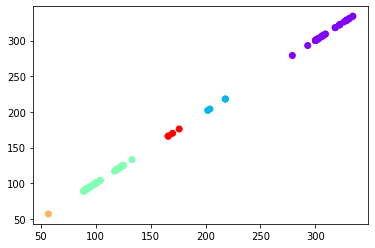

In [242]:
ptest=int(analisi.sample()["HDN_CODE"])
X=analisi[analisi["HDN_CODE"]==ptest]["DataRefInt"]
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=20, affinity='euclidean', linkage='single')
cluster.fit_predict(X.values.reshape(-1, 1));
plt.scatter(X,X, c=cluster.labels_, cmap='rainbow')
print(str(ptest)+" "+str(cluster.n_clusters_))

In [243]:
for pat in analisi["HDN_CODE"].unique():
    X=analisi[analisi["HDN_CODE"]==pat]["DataRefInt"]
    if(X.size==1):
        analisi.loc[analisi["HDN_CODE"]==pat, "label"] = 0
        continue
    cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=20, affinity='euclidean', linkage='single')
    cluster.fit_predict(X.values.reshape(-1, 1));
    analisi.loc[analisi["HDN_CODE"]==pat, "label"] = cluster.labels_

In [244]:
# dentro a label c'è il numero di visite di ogni paziente
analisi.head()

Titolo    DataRef  Emoglobina GlobuliRossi GlobuliBianchi  Linfociti  \
14261  Esami 2020-10-29         NaN          NaN            NaN        NaN   
14263  Esami 2020-10-29        15.0         5.28           6490       0.45   
14267  Esami 2020-10-30         NaN          NaN            NaN        NaN   
14269  Esami 2020-10-30        15.9         5.62          14330       0.54   
14265  Esami 2020-10-30         NaN          NaN            NaN        NaN   

       Linfociti_Assoluti  Neutrofili Med_Neutrofili_perc  Ematocrito  ...  \
14261                 NaN         NaN                 NaN         NaN  ...   
14263                 NaN        5.92                 9.3        45.7  ...   
14267                 NaN         NaN                 NaN         NaN  ...   
14269                 NaN       13.40                 8.6        49.4  ...   
14265                 NaN         NaN                 NaN         NaN  ...   

       ValidazioneData  ValidazioneUtente VersioneReferto  VES VES_Note  \
14261              NaN                NaN               1  NaN      NaN   
14263              NaN                NaN               2  NaN      NaN   
14267              NaN                NaN               1  NaN      NaN   
14269              NaN                NaN               1  NaN      NaN   
14265              NaN                NaN               1  NaN      NaN   

      HDN_CODE  ETA                 DATA  DataRefInt label  
14261     2236   64  26/02/2021 00:00:00         302   0.0  
14263     2236   64  26/02/2021 00:00:00         302   0.0  
14267     2236   64  26/02/2021 00:00:00         303   0.0  
14269     2236   64  26/02/2021 00:00:00         303   0.0  
14265     2236   64  26/02/2021 00:00:00         303   0.0  

[5 rows x 174 columns]

In [245]:
analisi[analisi['HDN_CODE'] == 3971180]

Titolo    DataRef  Emoglobina GlobuliRossi GlobuliBianchi  Linfociti  \
2921  Esami 2020-03-07        12.7         3.86           3780        NaN   
2923  Esami 2020-03-08        12.6         3.79           4210        NaN   
2925  Esami 2020-03-10        12.1         3.42           3490        NaN   
2927  Esami 2020-03-11         9.5         2.72           2360        NaN   
2929  Esami 2020-03-12        10.7         3.13           2560        NaN   
...     ...        ...         ...          ...            ...        ...   
3091  Esami 2021-01-29        10.7         3.77           6450        NaN   
3029  Esami 2021-02-05        10.8         3.93           5280        NaN   
2915  Esami 2021-02-15        11.0         3.98           4170        NaN   
3053  Esami 2021-03-11        12.1         4.59           3840        NaN   
3061  Esami 2021-03-25        12.3         4.74           3040        NaN   

      Linfociti_Assoluti  Neutrofili Med_Neutrofili_perc  Ematocrito  ...  \
2921                 NaN         NaN                 NaN         NaN  ...   
2923                 NaN         NaN                 NaN         NaN  ...   
2925                 NaN         NaN                 NaN         NaN  ...   
2927                 NaN         NaN                 NaN         NaN  ...   
2929                 NaN         NaN                 NaN         NaN  ...   
...                  ...         ...                 ...         ...  ...   
3091                 NaN         NaN                66.7        33.5  ...   
3029                 NaN         NaN                61.4        34.1  ...   
2915                 NaN         NaN                  63        34.1  ...   
3053                 NaN         NaN                51.3        36.3  ...   
3061                 NaN         NaN                55.4        36.8  ...   

      ValidazioneData  ValidazioneUtente VersioneReferto  VES VES_Note  \
2921              NaN                NaN               3  NaN      NaN   
2923              NaN                NaN               2  NaN      NaN   
2925              NaN                NaN               1  NaN      NaN   
2927              NaN                NaN               1  NaN      NaN   
2929              NaN                NaN               1  NaN      NaN   
...               ...                ...             ...  ...      ...   
3091              NaN                NaN               1  NaN      NaN   
3029              NaN                NaN               1  NaN      NaN   
2915              NaN                NaN               1  NaN      NaN   
3053              NaN                NaN               1  NaN      NaN   
3061              NaN                NaN               1  NaN      NaN   

     HDN_CODE  ETA                 DATA  DataRefInt label  
2921  3971180   60  27/07/2020 00:00:00          66   7.0  
2923  3971180   60  27/07/2020 00:00:00          67   7.0  
2925  3971180   60  27/07/2020 00:00:00          69   7.0  
2927  3971180   60  27/07/2020 00:00:00          70   7.0  
2929  3971180   60  27/07/2020 00:00:00          71   7.0  
...       ...  ...                  ...         ...   ...  
3091  3971180   60  27/07/2020 00:00:00         394   2.0  
3029  3971180   60  27/07/2020 00:00:00         401   2.0  
2915  3971180   60  27/07/2020 00:00:00         411   2.0  
3053  3971180   60  27/07/2020 00:00:00         435   0.0  
3061  3971180   60  27/07/2020 00:00:00         449   0.0  

[141 rows x 174 columns]

In [246]:
analisi['label'].value_counts()

0.0    6658
1.0     974
2.0     453
6.0      28
4.0      26
3.0      23
7.0      12
5.0       9
Name: label, dtype: int64

In [247]:
analisi.groupby(['HDN_CODE', 'label']).head()

Titolo    DataRef  Emoglobina GlobuliRossi GlobuliBianchi  Linfociti  \
14261  Esami 2020-10-29         NaN          NaN            NaN        NaN   
14263  Esami 2020-10-29        15.0         5.28           6490       0.45   
14267  Esami 2020-10-30         NaN          NaN            NaN        NaN   
14269  Esami 2020-10-30        15.9         5.62          14330       0.54   
14265  Esami 2020-10-30         NaN          NaN            NaN        NaN   
...      ...        ...         ...          ...            ...        ...   
9234   Esami 2020-04-10         NaN          NaN            NaN        NaN   
9235   Esami 2020-04-10         NaN          NaN            NaN        NaN   
9238   Esami 2020-04-11        11.1         4.16           8760      27.68   
9220   Esami 2020-09-21        14.7         5.46           9520       3.86   
9221   Esami 2020-09-21         NaN          NaN            NaN        NaN   

       Linfociti_Assoluti  Neutrofili Med_Neutrofili_perc  Ematocrito  ...  \
14261                 NaN         NaN                 NaN         NaN  ...   
14263                 NaN        5.92                 9.3        45.7  ...   
14267                 NaN         NaN                 NaN         NaN  ...   
14269                 NaN       13.40                 8.6        49.4  ...   
14265                 NaN         NaN                 NaN         NaN  ...   
...                   ...         ...                 ...         ...  ...   
9234               450.00         NaN                 NaN         NaN  ...   
9235                  NaN         NaN                 NaN         NaN  ...   
9238              2424.77     7919.04                90.4        35.4  ...   
9220                  NaN        4.75                 6.7        46.9  ...   
9221                  NaN         NaN                 NaN         NaN  ...   

       ValidazioneData  ValidazioneUtente VersioneReferto  VES VES_Note  \
14261              NaN                NaN               1  NaN      NaN   
14263              NaN                NaN               2  NaN      NaN   
14267              NaN                NaN               1  NaN      NaN   
14269              NaN                NaN               1  NaN      NaN   
14265              NaN                NaN               1  NaN      NaN   
...                ...                ...             ...  ...      ...   
9234               NaN                NaN               2  NaN      NaN   
9235               NaN                NaN               1  NaN      NaN   
9238               NaN                NaN               1  NaN      NaN   
9220               NaN                NaN               2  NaN      NaN   
9221               NaN                NaN               2  NaN      NaN   

      HDN_CODE  ETA                 DATA  DataRefInt label  
14261     2236   64  26/02/2021 00:00:00         302   0.0  
14263     2236   64  26/02/2021 00:00:00         302   0.0  
14267     2236   64  26/02/2021 00:00:00         303   0.0  
14269     2236   64  26/02/2021 00:00:00         303   0.0  
14265     2236   64  26/02/2021 00:00:00         303   0.0  
...        ...  ...                  ...         ...   ...  
9234   9428914   67  21/09/2020 00:00:00         100   0.0  
9235   9428914   67  21/09/2020 00:00:00         100   0.0  
9238   9428914   67  21/09/2020 00:00:00         101   0.0  
9220   9428914   67  21/09/2020 00:00:00         264   1.0  
9221   9428914   67  21/09/2020 00:00:00         264   1.0  

[2850 rows x 174 columns]

In [248]:
analisi.sample()

Titolo    DataRef  Emoglobina GlobuliRossi GlobuliBianchi  Linfociti  \
12884  Esami 2020-03-29        10.4         3.38          27750        NaN   

       Linfociti_Assoluti  Neutrofili Med_Neutrofili_perc  Ematocrito  ...  \
12884                 NaN         NaN                17.1        31.1  ...   

       ValidazioneData  ValidazioneUtente VersioneReferto  VES VES_Note  \
12884              NaN                NaN               1  NaN      NaN   

      HDN_CODE  ETA                 DATA  DataRefInt label  
12884  3870293   66  02/09/2020 00:00:00          88   0.0  

[1 rows x 174 columns]

In [249]:
analisi['Emoglobina'].describe()

count    4211.000000
mean       12.720280
std         1.757144
min         7.600000
25%        11.600000
50%        12.800000
75%        13.900000
max        18.100000
Name: Emoglobina, dtype: float64

In [250]:
# come trattare i valori di "Lieve anisocitosi" (3857817) ?
analisi['GlobuliRossi'].count()

4211

In [251]:
# come trattare i valori di "Numerose ombre linfocitarie" (3870293)?
analisi['GlobuliBianchi'].count()

4228

In [252]:
# altrimenti si usa la funzione pd.to_numeric(df, errors='coerce')

In [253]:
analisi['GlobuliBianchi'] = pd.to_numeric(analisi['GlobuliBianchi'], errors='coerce')

In [254]:
analisi['GlobuliBianchi'].describe()

count    4.225000e+03
mean     2.239019e+06
std      9.793948e+07
min      1.420000e+00
25%      3.530000e+03
50%      5.940000e+03
75%      8.790000e+03
max      4.630000e+09
Name: GlobuliBianchi, dtype: float64

In [255]:
# ci sono valori distribuiti molto male
analisi[analisi['GlobuliBianchi'] > 100000000]

Titolo    DataRef  Emoglobina GlobuliRossi  GlobuliBianchi  Linfociti  \
10069  Esami 2020-04-22         9.9         3.51    4.630000e+09        9.7   
10085  Esami 2020-04-29         9.6         3.49    4.370000e+09        0.0   

       Linfociti_Assoluti  Neutrofili Med_Neutrofili_perc  Ematocrito  ...  \
10069               450.0        3.96                85.5        30.1  ...   
10085               570.0        3.49                79.9        30.5  ...   

       ValidazioneData  ValidazioneUtente VersioneReferto  VES VES_Note  \
10069              NaN                NaN               2  NaN      NaN   
10085              NaN                NaN               1  NaN      NaN   

      HDN_CODE  ETA                 DATA  DataRefInt label  
10069  4384796   73  13/11/2020 00:00:00         112   0.0  
10085  4384796   73  13/11/2020 00:00:00         119   0.0  

[2 rows x 174 columns]

In [256]:
# controllo le unità di misura
analisi['GlobuliBianchi_Note'].value_counts()

migl./mmc 4.00-10.90    2971
( 4.00 - 10.90 )        1072
1                        171
( 4.50 - 13.50 )           6
migl./mmc 4.50-13.00       4
migl./mmc 4.50-12.00       1
Name: GlobuliBianchi_Note, dtype: int64

In [257]:
# quelli con 1 sono tutti in migliaia, 
analisi[analisi['GlobuliBianchi_Note'] == '1']['GlobuliBianchi']

14285    10000.0
14281     9120.0
11610     5820.0
12925     9280.0
12588     5850.0
          ...   
3198      8260.0
14908     7350.0
6891      5690.0
13507     1940.0
13537     1790.0
Name: GlobuliBianchi, Length: 171, dtype: float64

In [258]:
analisi.loc[analisi['GlobuliBianchi_Note'] == '1', 'GlobuliBianchi'] = analisi['GlobuliBianchi'] / 1000

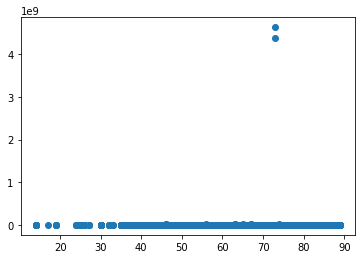

In [259]:
plt.scatter(analisi['ETA'],analisi['GlobuliBianchi'])

In [260]:
# cancello tutti quelli sopra a 150
analisi.loc[analisi['GlobuliBianchi'] > 150, 'GlobuliBianchi'] = np.nan

In [261]:
analisi['GlobuliBianchi'].isna().value_counts()

True     7294
False     889
Name: GlobuliBianchi, dtype: int64

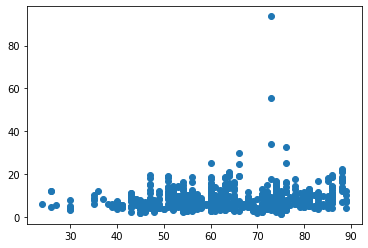

In [262]:
plt.scatter(analisi['ETA'],analisi['GlobuliBianchi'])

In [263]:
analisi['Linfociti'].describe()

count    2400.000000
mean       15.678129
std        20.144312
min         0.000000
25%         1.250000
50%         2.365000
75%        32.000000
max        93.040000
Name: Linfociti, dtype: float64

In [264]:
analisi['Linfociti'] = analisi['Linfociti'] * 1000

In [265]:
analisi.loc[(analisi['Linfociti_Assoluti'].isnull()), 'Linfociti_Assoluti'] = analisi['Linfociti']

In [266]:
analisi.drop(columns=['Linfociti'], inplace=True)

In [267]:
analisi['Linfociti_Assoluti'].isna().value_counts()

True     5675
False    2508
Name: Linfociti_Assoluti, dtype: int64

In [268]:
## ptest=int(analisi.sample()["HDN_CODE"])
analisi[analisi["HDN_CODE"]==ptest].groupby(["HDN_CODE", "label"])[["HDN_CODE","DataRef","GlobuliBianchi","Linfociti_Assoluti","Neutrofili","Piastrine","GPT_ALT","D_dimero","Fibrinogeno","Glicemia","INSULINA","PCR","label"]].head(100).sort_values(by = ["label"])

HDN_CODE    DataRef  GlobuliBianchi  Linfociti_Assoluti  Neutrofili  \
623   3857817 2020-11-30             NaN                 NaN         NaN   
731   3857817 2020-10-31             NaN                 NaN         NaN   
575   3857817 2020-10-30             NaN               300.0       13.16   
407   3857817 2020-10-29             NaN                 NaN         NaN   
463   3857817 2020-10-29             NaN                 NaN         NaN   
..        ...        ...             ...                 ...         ...   
487   3857817 2020-02-27             NaN               980.0        4.98   
739   3857817 2020-06-15             NaN              1150.0        9.84   
295   3857817 2020-06-25             NaN               800.0        9.64   
287   3857817 2020-06-15             NaN              1150.0        9.84   
291   3857817 2020-06-19             NaN               860.0         NaN   

     Piastrine GPT_ALT D_dimero  Fibrinogeno Glicemia  INSULINA   PCR  label  
623      296.0      51      NaN          NaN      110       NaN   1.7    0.0  
731      251.0      28      440        693.0      NaN       NaN   2.3    0.0  
575      232.0      22      460        778.0      NaN       NaN   5.8    0.0  
407        NaN     NaN      NaN          NaN      NaN       NaN   NaN    0.0  
463        NaN     NaN      NaN          NaN      NaN       NaN   NaN    0.0  
..         ...     ...      ...          ...      ...       ...   ...    ...  
487      189.0      12      NaN        436.0       90       NaN   NaN    3.0  
739      247.0      13      NaN          NaN      103       NaN  12.5    4.0  
295      467.0      31      NaN        955.0       96       NaN   5.8    4.0  
287      247.0      13      NaN          NaN      103       NaN  12.5    4.0  
291        NaN     NaN      NaN          NaN      NaN       NaN   NaN    4.0  

[127 rows x 13 columns]

In [269]:
analisi['Neutrofili'].describe()

count     2439.000000
mean      1603.723592
std       3266.702032
min          0.320000
25%          3.370000
50%          6.160000
75%       1921.925000
max      22604.400000
Name: Neutrofili, dtype: float64

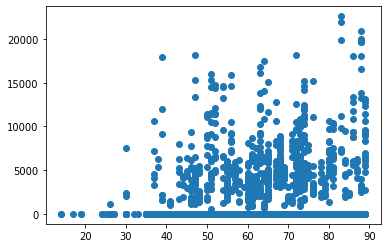

In [270]:
plt.scatter(analisi['ETA'], analisi['Neutrofili'])

In [271]:
# ci sono unità di misura diverse e vanno riunite
analisi.loc[analisi['Neutrofili_Note']=='calcolato', 'Neutrofili'] = analisi['Neutrofili'] / 1000

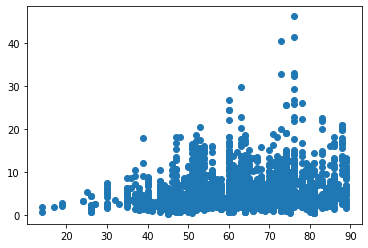

In [272]:
plt.scatter(analisi['ETA'], analisi['Neutrofili'])

In [273]:
analisi['Neutrofili'].isna().value_counts()

True     5744
False    2439
Name: Neutrofili, dtype: int64

In [274]:
analisi['Neutrofili_Note'].value_counts()

migl./mmc 1.80-7.70    1202
calcolato               665
( 1.80 - 7.70 )         554
1                        13
migl./mmc 1.80-8.00       3
( 1.80 - 8.00 )           2
Name: Neutrofili_Note, dtype: int64

In [275]:
# cosa posso fare da questo valore ? mi può servire per pulire i dati ?
analisi['VersioneReferto'].value_counts()

1    6626
2    1320
3     215
4      16
5       5
6       1
Name: VersioneReferto, dtype: int64

In [276]:
# i valori sono in migliaia ?
analisi['Piastrine'].describe()

count    4212.000000
mean      262.822412
std       122.629951
min        16.000000
25%       181.000000
50%       244.000000
75%       326.000000
max       983.000000
Name: Piastrine, dtype: float64

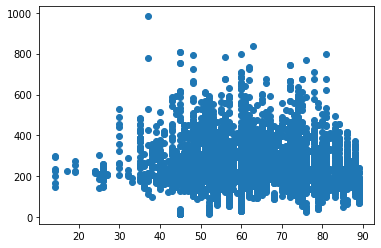

In [277]:
plt.scatter(analisi['ETA'], analisi['Piastrine'])

In [278]:
analisi['Piastrine'].isna().value_counts()

False    4212
True     3971
Name: Piastrine, dtype: int64

In [279]:
analisi['Creatinina'].describe()

count    4133.000000
mean        0.956192
std         1.007147
min         0.210000
25%         0.660000
50%         0.790000
75%         0.950000
max        13.880000
Name: Creatinina, dtype: float64

In [280]:
analisi[analisi['D_dimero'] == '> 40.000']['D_dimero'].count()

11

In [281]:
# metto un valore di default (da chiedere se va bene)
analisi['D_dimero'].replace('> 40.000', 40000, inplace = True)

In [282]:
analisi['D_dimero'] = analisi['D_dimero'].astype(float)

In [283]:
# la media è ampiamente sopra l'intervallo massimo
analisi['D_dimero'].describe()

count     3409.000000
mean      2268.048695
std       4439.228006
min         40.000000
25%        500.000000
50%       1000.000000
75%       2130.000000
max      40000.000000
Name: D_dimero, dtype: float64

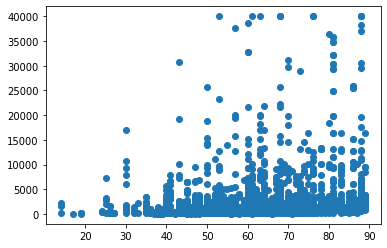

In [284]:
plt.scatter(analisi['ETA'], analisi['D_dimero'])

In [285]:
analisi['D_dimero'].isna().value_counts()

True     4774
False    3409
Name: D_dimero, dtype: int64

In [286]:
# sono 30 persone, però sono tutte vuote le righe
analisi[(analisi['Interleuchina6'] == '>2300') | (analisi['Interleuchina6'] == '> 2300')]['Interleuchina6'].count()

30

In [287]:
# metto un valore di default (da chiedere se va bene)

analisi['Interleuchina6'].replace({ 'esame non eseguito':np.nan,
                                    '>2300':'2300',
                                    '> 2300':'2300'}, inplace = True)
analisi['Interleuchina6'] = analisi['Interleuchina6'].astype(str)
analisi['Interleuchina6'] = analisi['Interleuchina6'].apply(lambda x: x.replace(',', '.'))
analisi['Interleuchina6'] = analisi['Interleuchina6'].astype(float)

In [288]:
analisi.loc[analisi['Interleuchina6']>2300, 'Interleuchina6'] = 2300

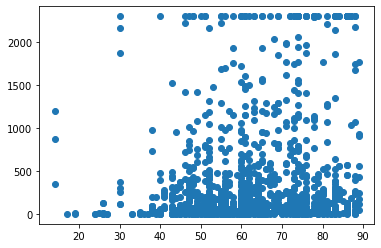

In [289]:
plt.scatter(analisi['ETA'], analisi['Interleuchina6'])

In [290]:
analisi['Interleuchina6'].dtype

dtype('float64')

In [291]:
# controllare il valore
analisi[analisi['Interleuchina6']==2300]['Interleuchina6'].count()

71

In [292]:
# sono però molto sparsi come valori
analisi['Interleuchina6'].describe()

count    1265.000000
mean      397.901945
std       621.539738
min         0.100000
25%        25.150000
50%       129.230000
75%       426.460000
max      2300.000000
Name: Interleuchina6, dtype: float64

In [293]:
analisi[(analisi['PCR'] == '<0.2') | (analisi['PCR'] == '< 0.2')]['PCR'].count()

1035

In [294]:
analisi['PCR'].replace({'<0.2':'0.2',
                        '< 0.2':'0.2'}, inplace = True)
analisi['PCR'] = analisi['PCR'].astype(str)
analisi['PCR'] = analisi['PCR'].apply(lambda x: x.replace(',', '.'))
analisi['PCR'] = analisi['PCR'].astype(float)

In [295]:
# non c'è per tutti l'esame
analisi['PCR'].describe()

count    4100.000000
mean        3.964659
std         6.177735
min         0.200000
25%         0.200000
50%         1.200000
75%         4.900000
max        49.800000
Name: PCR, dtype: float64

In [296]:
analisi['PCR'].isna().value_counts()

False    4100
True     4083
Name: PCR, dtype: int64

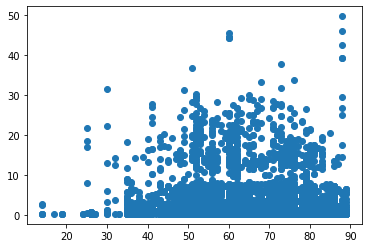

In [297]:
plt.scatter(analisi['ETA'], analisi['PCR'])

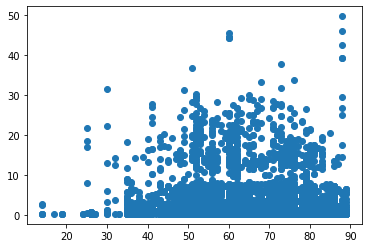

In [298]:
plt.scatter(analisi['ETA'], analisi['PCR'])

In [299]:
analisi[analisi['GPT_ALT'] == '<5']['GPT_ALT'].count()

2

In [300]:
#analisi.loc[analisi['GPT_ALT'] == '<5', 'GPT_ALT'] = np.nan

In [301]:
# metto un valore default
analisi['GPT_ALT'].replace('<5', '5', inplace=True)

In [302]:
analisi['GPT_ALT'] = analisi['GPT_ALT'].astype(float)

In [303]:
analisi['GPT_ALT'].describe()

count    3996.000000
mean       61.397898
std        70.613899
min         5.000000
25%        23.000000
50%        41.000000
75%        73.000000
max      1046.000000
Name: GPT_ALT, dtype: float64

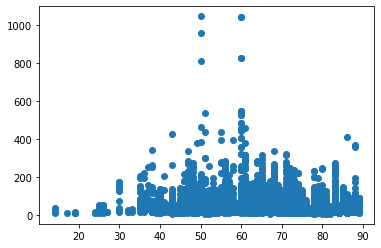

In [304]:
plt.scatter(analisi['ETA'], analisi['GPT_ALT'])

In [305]:
analisi['GPT_ALT'].isna().value_counts()

True     4187
False    3996
Name: GPT_ALT, dtype: int64

In [306]:
analisi['Fibrinogeno'].describe()

count    3005.000000
mean      447.403328
std       183.930624
min        82.000000
25%       310.000000
50%       421.000000
75%       572.000000
max      1147.000000
Name: Fibrinogeno, dtype: float64

In [307]:
analisi['Fibrinogeno'].isna().value_counts()

True     5178
False    3005
Name: Fibrinogeno, dtype: int64

In [308]:
analisi[analisi['Glicemia'] == '<20']['Glicemia'].count()

1

In [309]:
analisi['Glicemia'] = analisi['Glicemia'].astype(str)
# analisi.loc[analisi['Glicemia']=='<20','Glicemia'] = np.nan
analisi.loc[analisi['Glicemia']=='<20','Glicemia'] = 20
analisi['Glicemia'] = analisi['Glicemia'].astype(float)
analisi['Glicemia'].describe()

count    2870.000000
mean      103.621603
std        43.612033
min        20.000000
25%        80.000000
50%        93.000000
75%       115.000000
max       788.000000
Name: Glicemia, dtype: float64

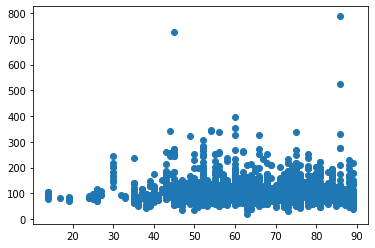

In [310]:
plt.scatter(analisi['ETA'], analisi['Glicemia'])

In [311]:
# molti diabetici ?
analisi[analisi['Glicemia']>126]['Glicemia'].count()

494

In [312]:
analisi['Glicemia'].isna().value_counts()

True     5313
False    2870
Name: Glicemia, dtype: int64

In [313]:
analisi['INSULINA'].describe()

count    447.000000
mean      11.702013
std       11.972310
min        2.500000
25%        6.000000
50%        8.900000
75%       12.900000
max      167.600000
Name: INSULINA, dtype: float64

In [314]:
analisi['INSULINA'].isna().value_counts()

True     7736
False     447
Name: INSULINA, dtype: int64

## Pulizia dei dati duplicati

In [315]:
prova_pulizia = analisi.fillna(method='bfill')

In [316]:
prova_pulizia = prova_pulizia.fillna(method='ffill')

In [317]:
prova_pulizia.drop_duplicates(inplace=True);

In [318]:
prova_pulizia

Titolo    DataRef  Emoglobina GlobuliRossi  GlobuliBianchi  \
14261  Esami 2020-10-29        15.0         5.28           10.00   
14263  Esami 2020-10-29        15.0         5.28           10.00   
14267  Esami 2020-10-30        15.9         5.62           10.00   
14269  Esami 2020-10-30        15.9         5.62           10.00   
14265  Esami 2020-10-30        14.5         5.13           10.00   
...      ...        ...         ...          ...             ...   
9229   Esami 2020-05-13        13.6         4.79            4.94   
9236   Esami 2020-05-14        13.6         4.79            4.94   
9237   Esami 2020-05-14        14.7         5.46            4.94   
9220   Esami 2020-09-21        14.7         5.46            4.94   
9221   Esami 2020-09-21        14.7         5.46            4.94   

       Linfociti_Assoluti  Neutrofili Med_Neutrofili_perc  Ematocrito  \
14261               450.0        5.92                 9.3        45.7   
14263               450.0        5.92                 9.3        45.7   
14267               540.0       13.40                 8.6        49.4   
14269               540.0       13.40                 8.6        49.4   
14265              1170.0        6.20                77.2        44.6   
...                   ...         ...                 ...         ...   
9229               3860.0        4.75                 6.7        41.8   
9236               3860.0        4.75                 6.7        41.8   
9237               3860.0        4.75                 6.7        46.9   
9220               3860.0        4.75                 6.7        46.9   
9221               3860.0        4.75                 6.7        46.9   

       Piastrine  ...  ValidazioneData  ValidazioneUtente  VersioneReferto  \
14261      223.0  ...              NaN                NaN                1   
14263      223.0  ...              NaN                NaN                2   
14267      267.0  ...              NaN                NaN                1   
14269      267.0  ...              NaN                NaN                1   
14265      310.0  ...              NaN                NaN                1   
...          ...  ...              ...                ...              ...   
9229       242.0  ...              NaN                NaN                1   
9236       242.0  ...              NaN                NaN                1   
9237       350.0  ...              NaN                NaN                2   
9220       350.0  ...              NaN                NaN                2   
9221       350.0  ...              NaN                NaN                2   

        VES VES_Note  HDN_CODE ETA                 DATA DataRefInt label  
14261  33.0  mm 2-28      2236  64  26/02/2021 00:00:00        302   0.0  
14263  33.0  mm 2-28      2236  64  26/02/2021 00:00:00        302   0.0  
14267  33.0  mm 2-28      2236  64  26/02/2021 00:00:00        303   0.0  
14269  33.0  mm 2-28      2236  64  26/02/2021 00:00:00        303   0.0  
14265  33.0  mm 2-28      2236  64  26/02/2021 00:00:00        303   0.0  
...     ...      ...       ...  ..                  ...        ...   ...  
9229   21.0  mm 2-39   9428914  67  21/09/2020 00:00:00        133   0.0  
9236   21.0  mm 2-39   9428914  67  21/09/2020 00:00:00        134   0.0  
9237   21.0  mm 2-39   9428914  67  21/09/2020 00:00:00        134   0.0  
9220   21.0  mm 2-39   9428914  67  21/09/2020 00:00:00        264   1.0  
9221   21.0  mm 2-39   9428914  67  21/09/2020 00:00:00        264   1.0  

[8183 rows x 173 columns]

In [319]:
colonne_richieste = 'GlobuliBianchi Linfociti_Assoluti Neutrofili Piastrine GPT_ALT D_dimero Fibrinogeno Glicemia INSULINA PCR'.split(' ')

In [320]:
analisi.groupby(['HDN_CODE','label'])[colonne_richieste].agg([np.mean, 'min', 'max'])

GlobuliBianchi              Linfociti_Assoluti          \
                         mean   min    max               mean     min   
HDN_CODE label                                                          
2236     0.0            9.560  9.12  10.00         784.000000   450.0   
         1.0              NaN   NaN    NaN        1640.000000  1640.0   
6426     0.0              NaN   NaN    NaN        1300.000000  1300.0   
         1.0            5.820  5.82   5.82        2160.000000  2160.0   
8377     0.0            8.745  3.14  18.57                NaN     NaN   
...                       ...   ...    ...                ...     ...   
9427171  0.0            3.780  3.78   3.78                NaN     NaN   
9427785  0.0            5.248  3.63   7.50        1120.000000  1120.0   
         1.0              NaN   NaN    NaN        2620.000000  2620.0   
9428914  0.0              NaN   NaN    NaN        1746.294286   330.0   
         1.0              NaN   NaN    NaN        3860.000000  3860.0   

                        Neutrofili                Piastrine  ... Fibrinogeno  \
                    max       mean   min    max        mean  ...         max   
HDN_CODE label                                               ...               
2236     0.0    1170.00   8.277500  5.92  13.40  324.000000  ...       699.0   
         1.0    1640.00   2.650000  2.65   2.65  243.000000  ...       329.0   
6426     0.0    1300.00   2.320000  2.32   2.32  202.333333  ...       546.0   
         1.0    2160.00   2.700000  2.70   2.70  179.000000  ...       347.0   
8377     0.0        NaN        NaN   NaN    NaN  283.166667  ...       748.0   
...                 ...        ...   ...    ...         ...  ...         ...   
9427171  0.0        NaN        NaN   NaN    NaN  384.833333  ...       529.0   
9427785  0.0    1120.00   2.180000  2.18   2.18  253.600000  ...       770.0   
         1.0    2620.00   4.380000  4.38   4.38  259.000000  ...       320.0   
9428914  0.0    4656.96   6.714856  2.52  13.57  284.136364  ...       752.0   
         1.0    3860.00   4.750000  4.75   4.75  350.000000  ...       398.0   

                  Glicemia              INSULINA                    PCR       \
                      mean   min    max     mean   min   max       mean  min   
HDN_CODE label                                                                 
2236     0.0     96.666667  56.0  126.0      NaN   NaN   NaN   4.887500  0.2   
         1.0     81.000000  81.0   81.0      7.3   7.3   7.3   0.200000  0.2   
6426     0.0     98.714286  84.0  129.0     13.8  13.8  13.8   1.200000  0.2   
         1.0     88.000000  88.0   88.0      6.3   6.3   6.3   0.200000  0.2   
8377     0.0    105.500000  83.0  131.0      NaN   NaN   NaN  10.916667  1.0   
...                    ...   ...    ...      ...   ...   ...        ...  ...   
9427171  0.0           NaN   NaN    NaN      NaN   NaN   NaN   2.233333  0.7   
9427785  0.0     82.000000  82.0   82.0      NaN   NaN   NaN  13.800000  4.1   
         1.0     82.000000  82.0   82.0     12.1  12.1  12.1   0.200000  0.2   
9428914  0.0    104.692308  76.0  233.0      7.3   4.4  10.2   0.843478  0.2   
         1.0     77.000000  77.0   77.0     22.4  22.4  22.4   0.400000  0.4   

                      
                 max  
HDN_CODE label        
2236     0.0    17.4  
         1.0     0.2  
6426     0.0     2.9  
         1.0     0.2  
8377     0.0    22.8  
...              ...  
9427171  0.0     4.1  
9427785  0.0    22.6  
         1.0     0.2  
9428914  0.0     6.9  
         1.0     0.4  

[811 rows x 30 columns]

In [321]:
medie = analisi.groupby(["HDN_CODE","label"])[colonne_richieste].mean()

In [322]:
medie

GlobuliBianchi  Linfociti_Assoluti  Neutrofili   Piastrine  \
HDN_CODE label                                                               
2236     0.0             9.560          784.000000    8.277500  324.000000   
         1.0               NaN         1640.000000    2.650000  243.000000   
6426     0.0               NaN         1300.000000    2.320000  202.333333   
         1.0             5.820         2160.000000    2.700000  179.000000   
8377     0.0             8.745                 NaN         NaN  283.166667   
...                        ...                 ...         ...         ...   
9427171  0.0             3.780                 NaN         NaN  384.833333   
9427785  0.0             5.248         1120.000000    2.180000  253.600000   
         1.0               NaN         2620.000000    4.380000  259.000000   
9428914  0.0               NaN         1746.294286    6.714856  284.136364   
         1.0               NaN         3860.000000    4.750000  350.000000   

                  GPT_ALT     D_dimero  Fibrinogeno    Glicemia  INSULINA  \
HDN_CODE label                                                              
2236     0.0    92.000000  1065.714286   450.428571   96.666667       NaN   
         1.0    23.000000   590.000000   329.000000   81.000000       7.3   
6426     0.0    26.428571   323.333333   464.200000   98.714286      13.8   
         1.0    15.000000   450.000000   347.000000   88.000000       6.3   
8377     0.0    97.166667  1960.000000   568.000000  105.500000       NaN   
...                   ...          ...          ...         ...       ...   
9427171  0.0    53.500000   736.666667   529.000000         NaN       NaN   
9427785  0.0    55.500000   727.500000   766.500000   82.000000       NaN   
         1.0    25.000000   230.000000   320.000000   82.000000      12.1   
9428914  0.0    77.045455  3366.818182   355.500000  104.692308       7.3   
         1.0    20.000000   440.000000   398.000000   77.000000      22.4   

                      PCR  
HDN_CODE label             
2236     0.0     4.887500  
         1.0     0.200000  
6426     0.0     1.200000  
         1.0     0.200000  
8377     0.0    10.916667  
...                   ...  
9427171  0.0     2.233333  
9427785  0.0    13.800000  
         1.0     0.200000  
9428914  0.0     0.843478  
         1.0     0.400000  

[811 rows x 10 columns]

In [323]:
sangue_medie = medie.groupby("HDN_CODE").mean()

In [324]:
sangue_medie

GlobuliBianchi  Linfociti_Assoluti  Neutrofili   Piastrine  \
HDN_CODE                                                               
2236            9.560000         1212.000000    5.463750  283.500000   
6426            5.820000         1730.000000    2.510000  190.666667   
8377            8.745000         1670.000000    2.760000  264.583333   
11463          10.338571         2142.268235    5.500753  215.142857   
13034           8.725000         1791.683333    5.166706  260.366667   
...                  ...                 ...         ...         ...   
9415100         7.900000         1790.793636    5.973895  172.666667   
9417013         1.865000          664.000000    1.383125   25.674056   
9427171         3.780000                 NaN         NaN  384.833333   
9427785         5.248000         1870.000000    3.280000  256.300000   
9428914              NaN         2803.147143    5.732428  317.068182   

            GPT_ALT     D_dimero  Fibrinogeno    Glicemia  INSULINA       PCR  
HDN_CODE                                                                       
2236      57.500000   827.857143   389.714286   88.833333      7.30  2.543750  
6426      20.714286   386.666667   405.600000   93.357143     10.05  0.700000  
8377      60.083333  1135.000000   426.500000  101.750000     12.90  5.558333  
11463     64.466667  1654.666667   524.916667   90.833333      9.40  2.330000  
13034     25.466667  1129.523810   331.500000   78.000000      8.90  1.490000  
...             ...          ...          ...         ...       ...       ...  
9415100   22.333333  4602.500000   446.500000  112.409091      9.50  1.841667  
9417013   60.902998  2920.000000   163.100000  124.072000     12.85  0.201235  
9427171   53.500000   736.666667   529.000000         NaN       NaN  2.233333  
9427785   40.250000   478.750000   543.250000   82.000000     12.10  7.000000  
9428914   48.522727  1903.409091   376.750000   90.846154     14.85  0.621739  

[388 rows x 10 columns]

In [325]:
solo_ricovero = analisi.groupby(['HDN_CODE'])['label'].nunique() == 1

In [326]:
solo_ricovero = solo_ricovero[solo_ricovero == True]

In [327]:
solo_ricovero.count()

30

In [328]:
solo_ricovero.index.values

array([  26530,   57642, 3811004, 3834350, 3871524, 3873724, 3874017,
       3964856, 3983336, 4007013, 4029294, 4030019, 4045795, 4052685,
       4125420, 4127849, 4186494, 4291734, 5236003, 6004171, 6583675,
       6753936, 6761601, 7012370, 7024751, 7200274, 8550495, 8577320,
       9257103, 9427171])

In [329]:
solo_ricovero

HDN_CODE
26530      True
57642      True
3811004    True
3834350    True
3871524    True
3873724    True
3874017    True
3964856    True
3983336    True
4007013    True
4029294    True
4030019    True
4045795    True
4052685    True
4125420    True
4127849    True
4186494    True
4291734    True
5236003    True
6004171    True
6583675    True
6753936    True
6761601    True
7012370    True
7024751    True
7200274    True
8550495    True
8577320    True
9257103    True
9427171    True
Name: label, dtype: bool

In [330]:
# droppo tutti quelli con solo il ricovero secondo la label
#analisi.drop(analisi[analisi['HDN_CODE'].isin(solo_ricovero.index.values)].index, inplace=True)

In [331]:
# identifico l'ultima data con il valore -1 nella label
#for patient in analisi['HDN_CODE'].unique():
#    last_visit = max(analisi[analisi['HDN_CODE'] == patient]['DataRef'])
#    last_visit_label = analisi[(analisi['HDN_CODE'] == patient) & (analisi['DataRef'] == last_visit)]['label'].unique()[0]
#    analisi.loc[(analisi['HDN_CODE'] == patient) & (analisi['label'] == last_visit_label), 'label'] = -1

In [332]:
#analisi['label'].value_counts()

In [333]:
# funzione per controllare che tutte il referto dell'esame del sangue sia entro un delta dall'esame infettivologico
def check_visit_date(hdn_code, data_sangue, days_delta=15):
    for esame_i in postCovid['Estrai_Tutto'][postCovid['Estrai_Tutto']['HDN_CODE'] == hdn_code].iterrows():
        if(abs((pd.to_datetime(data_sangue, format="%d/%m/%Y %H:%M:%S") - pd.to_datetime(esame_i[1]['DATA'], format="%d/%m/%Y %H:%M:%S")).days) < days_delta):
            return False
    return True

In [334]:
# test funzione
check_visit_date(13034, pd.to_datetime('05/07/2020 00:00:00', format="%d/%m/%Y %H:%M:%S"))

False

In [335]:
# selezione degli esami da rimuovere
analisi['to_drop'] = analisi.apply(lambda x: check_visit_date(x['HDN_CODE'], x['DataRef'], days_delta=30), axis=1)

In [336]:
# ottengo tutte le persone da tenere perché sono vicine al time delta di 15 giorni
test_drop = analisi[(analisi['to_drop'] == False)]
test_drop.shape

(1047, 174)

In [337]:
postCovid['Estrai_Tutto'][postCovid['Estrai_Tutto']['HDN_CODE'] == 3857817]['DATA']

264    17/09/2020 00:00:00
265    18/06/2020 00:00:00
287    17/09/2020 00:00:00
288    17/11/2020 00:00:00
Name: DATA, dtype: object

In [338]:
test_drop.drop(columns='to_drop')

Titolo    DataRef  Emoglobina GlobuliRossi  GlobuliBianchi  \
14289  Esami 2021-02-18        16.6         5.78             NaN   
14283  Esami 2021-02-18         NaN          NaN             NaN   
11614  Esami 2021-03-18         NaN          NaN             NaN   
11610  Esami 2021-03-18        12.9         4.55            5.82   
11613  Esami 2021-03-18        12.9         4.55             NaN   
...      ...        ...         ...          ...             ...   
13497  Esami 2020-11-06         NaN          NaN             NaN   
17522  Esami 2020-09-02        13.5         5.08             NaN   
17525  Esami 2020-09-02         NaN          NaN             NaN   
9220   Esami 2020-09-21        14.7         5.46             NaN   
9221   Esami 2020-09-21         NaN          NaN             NaN   

       Linfociti_Assoluti  Neutrofili Med_Neutrofili_perc  Ematocrito  \
14289              1640.0        2.65                55.9        51.8   
14283                 NaN         NaN                 NaN         NaN   
11614                 NaN         NaN                 NaN         NaN   
11610              2160.0        2.70                46.5        38.7   
11613              2160.0        2.70                46.5        38.7   
...                   ...         ...                 ...         ...   
13497                 NaN         NaN                 NaN         NaN   
17522              2620.0        4.38                 8.6        42.5   
17525                 NaN         NaN                 NaN         NaN   
9220               3860.0        4.75                 6.7        46.9   
9221                  NaN         NaN                 NaN         NaN   

       Piastrine  ...  ValidazioneData  ValidazioneUtente  VersioneReferto  \
14289      243.0  ...              NaN                NaN                1   
14283        NaN  ...              NaN                NaN                1   
11614        NaN  ...              NaN                NaN                1   
11610      179.0  ...              NaN                NaN                1   
11613      179.0  ...              NaN                NaN                1   
...          ...  ...              ...                ...              ...   
13497        NaN  ...              NaN                NaN                1   
17522      259.0  ...              NaN                NaN                1   
17525        NaN  ...              NaN                NaN                2   
9220       350.0  ...              NaN                NaN                2   
9221         NaN  ...              NaN                NaN                2   

      VES VES_Note  HDN_CODE ETA                 DATA DataRefInt label  
14289 NaN      NaN      2236  64  26/02/2021 00:00:00        414   1.0  
14283 NaN      NaN      2236  64  26/02/2021 00:00:00        414   1.0  
11614 NaN      NaN      6426  48  02/04/2021 00:00:00        442   1.0  
11610 NaN      NaN      6426  48  02/04/2021 00:00:00        442   1.0  
11613 NaN      NaN      6426  48  02/04/2021 00:00:00        442   1.0  
...    ..      ...       ...  ..                  ...        ...   ...  
13497 NaN      NaN   9417013  45  05/11/2020 00:00:00        310   1.0  
17522 NaN      NaN   9427785  60  22/09/2020 00:00:00        245   1.0  
17525 NaN      NaN   9427785  60  22/09/2020 00:00:00        245   1.0  
9220  NaN      NaN   9428914  67  21/09/2020 00:00:00        264   1.0  
9221  NaN      NaN   9428914  67  21/09/2020 00:00:00        264   1.0  

[1047 rows x 173 columns]

In [339]:
test_drop.groupby(['HDN_CODE', 'DATA']).head()

Titolo    DataRef  Emoglobina GlobuliRossi  GlobuliBianchi  \
14289  Esami 2021-02-18        16.6         5.78             NaN   
14283  Esami 2021-02-18         NaN          NaN             NaN   
11614  Esami 2021-03-18         NaN          NaN             NaN   
11610  Esami 2021-03-18        12.9         4.55            5.82   
11613  Esami 2021-03-18        12.9         4.55             NaN   
...      ...        ...         ...          ...             ...   
13485  Esami 2020-11-06         NaN          NaN             NaN   
17522  Esami 2020-09-02        13.5         5.08             NaN   
17525  Esami 2020-09-02         NaN          NaN             NaN   
9220   Esami 2020-09-21        14.7         5.46             NaN   
9221   Esami 2020-09-21         NaN          NaN             NaN   

       Linfociti_Assoluti  Neutrofili Med_Neutrofili_perc  Ematocrito  \
14289              1640.0        2.65                55.9        51.8   
14283                 NaN         NaN                 NaN         NaN   
11614                 NaN         NaN                 NaN         NaN   
11610              2160.0        2.70                46.5        38.7   
11613              2160.0        2.70                46.5        38.7   
...                   ...         ...                 ...         ...   
13485                 NaN         NaN                 NaN         NaN   
17522              2620.0        4.38                 8.6        42.5   
17525                 NaN         NaN                 NaN         NaN   
9220               3860.0        4.75                 6.7        46.9   
9221                  NaN         NaN                 NaN         NaN   

       Piastrine  ...  ValidazioneUtente  VersioneReferto  VES VES_Note  \
14289      243.0  ...                NaN                1  NaN      NaN   
14283        NaN  ...                NaN                1  NaN      NaN   
11614        NaN  ...                NaN                1  NaN      NaN   
11610      179.0  ...                NaN                1  NaN      NaN   
11613      179.0  ...                NaN                1  NaN      NaN   
...          ...  ...                ...              ...  ...      ...   
13485        NaN  ...                NaN                1  NaN      NaN   
17522      259.0  ...                NaN                1  NaN      NaN   
17525        NaN  ...                NaN                2  NaN      NaN   
9220       350.0  ...                NaN                2  NaN      NaN   
9221         NaN  ...                NaN                2  NaN      NaN   

      HDN_CODE  ETA                 DATA  DataRefInt label to_drop  
14289     2236   64  26/02/2021 00:00:00         414   1.0   False  
14283     2236   64  26/02/2021 00:00:00         414   1.0   False  
11614     6426   48  02/04/2021 00:00:00         442   1.0   False  
11610     6426   48  02/04/2021 00:00:00         442   1.0   False  
11613     6426   48  02/04/2021 00:00:00         442   1.0   False  
...        ...  ...                  ...         ...   ...     ...  
13485  9417013   45  05/11/2020 00:00:00         310   1.0   False  
17522  9427785   60  22/09/2020 00:00:00         245   1.0   False  
17525  9427785   60  22/09/2020 00:00:00         245   1.0   False  
9220   9428914   67  21/09/2020 00:00:00         264   1.0   False  
9221   9428914   67  21/09/2020 00:00:00         264   1.0   False  

[921 rows x 174 columns]

## Table 13

In [340]:
ricovero = postCovid['Table13']

In [341]:
ricovero = pd.merge(ricovero, postCovid['Estrai_Tutto'][["HDN_CODE",'DATA']].drop_duplicates(["HDN_CODE"]), left_on='HDN_CODE', right_on='HDN_CODE')

In [342]:
ricovero.head()

Titolo  IdAdmission  AdmissionCode  IdPatient  HDN_CODE  \
0  RICOVERO      2284799    90420006624    1243306   7217584   
1  RICOVERO      2284799    90420006624    1243306   7217584   
2  RICOVERO      2285063    90420006883     356001   3971180   
3  RICOVERO      2285063    90420006883     356001   3971180   
4  RICOVERO      2285259    90420007076     209322   3812139   

         AdmissionTime        RepartoDimissione       DataDimissione  \
0  25/02/2020 20:00:00  MEDICINA INT.AREA CRIT.  30/03/2020 16:15:00   
1  25/02/2020 20:00:00  MEDICINA INT.AREA CRIT.  30/03/2020 16:15:00   
2  27/02/2020 19:44:00  MEDICINA INT.AREA CRIT.  23/03/2020 15:10:00   
3  27/02/2020 19:44:00  MEDICINA INT.AREA CRIT.  23/03/2020 15:10:00   
4  29/02/2020 23:00:00  MEDICINA INT.AREA CRIT.  19/03/2020 17:00:00   

                                  ModalitaDimissione    Covid19  \
0                  Dimissione Ordinaria al domicilio  Accertato   
1                  Dimissione Ordinaria al domicilio  Accertato   
2  Trasferimento ad altro regime ricov. o altro t...  Accertato   
3  Trasferimento ad altro regime ricov. o altro t...  Accertato   
4                  Dimissione Ordinaria al domicilio  Accertato   

                  DATA  
0  04/08/2020 00:00:00  
1  04/08/2020 00:00:00  
2  27/07/2020 00:00:00  
3  27/07/2020 00:00:00  
4  15/07/2020 00:00:00

In [343]:
ricovero['DurataRicovero'] = pd.to_datetime(ricovero['DataDimissione'], format="%d/%m/%Y %H:%M:%S") - pd.to_datetime(ricovero['AdmissionTime'], format="%d/%m/%Y %H:%M:%S")

In [344]:
ricovero.drop_duplicates(inplace=True)

In [345]:
ricovero

Titolo  IdAdmission  AdmissionCode  IdPatient  HDN_CODE  \
0    RICOVERO      2284799    90420006624    1243306   7217584   
2    RICOVERO      2285063    90420006883     356001   3971180   
4    RICOVERO      2285259    90420007076     209322   3812139   
6    RICOVERO      2289624    90420011392     344744   3958856   
8    RICOVERO      2286038    90420007841     344744   3958856   
..        ...          ...            ...        ...       ...   
801  RICOVERO      2309046    90420030604      52460     57642   
802  RICOVERO      2315172    90421003597     482838   4196305   
803  RICOVERO      2315835    90421004252     468783   4181606   
804  RICOVERO      2307651    90420029224     396702   4016031   
806  RICOVERO      2310032    90420031577    1777842   1190415   

           AdmissionTime                   RepartoDimissione  \
0    25/02/2020 20:00:00             MEDICINA INT.AREA CRIT.   
2    27/02/2020 19:44:00             MEDICINA INT.AREA CRIT.   
4    29/02/2020 23:00:00             MEDICINA INT.AREA CRIT.   
6    02/05/2020 23:24:00             MEDICINA INT.AREA CRIT.   
8    09/03/2020 16:10:00             MEDICINA INT.AREA CRIT.   
..                   ...                                 ...   
801  30/11/2020 23:48:00  MEDICINA INT.AREA CRIT. COVID ROOM   
802  09/02/2021 20:01:00  MEDICINA INT.AREA CRIT. COVID ROOM   
803  16/02/2021 22:27:00  MEDICINA INT.AREA CRIT. COVID ROOM   
804  15/11/2020 18:22:00  MEDICINA INT.AREA CRIT. COVID ROOM   
806  12/12/2020 17:53:00              MEDICINA INTERNA COVID   

          DataDimissione                                 ModalitaDimissione  \
0    30/03/2020 16:15:00                  Dimissione Ordinaria al domicilio   
2    23/03/2020 15:10:00  Trasferimento ad altro regime ricov. o altro t...   
4    19/03/2020 17:00:00                  Dimissione Ordinaria al domicilio   
6    22/05/2020 15:19:00                  Dimissione Ordinaria al domicilio   
8    24/04/2020 11:55:00  Trasferimento ad altro regime ricov. o altro t...   
..                   ...                                                ...   
801  14/12/2020 15:01:00                  Dimissione Ordinaria al domicilio   
802  13/02/2021 18:07:00                  Dimissione Ordinaria al domicilio   
803  22/02/2021 14:56:00                  Dimissione Ordinaria al domicilio   
804  17/12/2020 19:06:00                  Dimissione Ordinaria al domicilio   
806  19/12/2020 17:50:00                  Dimissione Ordinaria al domicilio   

       Covid19                 DATA   DurataRicovero  
0    Accertato  04/08/2020 00:00:00 33 days 20:15:00  
2    Accertato  27/07/2020 00:00:00 24 days 19:26:00  
4    Accertato  15/07/2020 00:00:00 18 days 18:00:00  
6    Accertato  21/09/2020 00:00:00 19 days 15:55:00  
8    Accertato  21/09/2020 00:00:00 45 days 19:45:00  
..         ...                  ...              ...  
801  Accertato  25/02/2021 00:00:00 13 days 15:13:00  
802  Accertato  25/03/2021 00:00:00  3 days 22:06:00  
803  Accertato  23/03/2021 00:00:00  5 days 16:29:00  
804  Accertato  24/02/2021 00:00:00 32 days 00:44:00  
806  Accertato  06/04/2021 00:00:00  6 days 23:57:00  

[384 rows x 12 columns]

In [346]:
ricovero['TempoDallaVisita'] = pd.to_datetime(ricovero['DATA'], format="%d/%m/%Y %H:%M:%S") - pd.to_datetime(ricovero['DataDimissione'], format="%d/%m/%Y %H:%M:%S")

In [347]:
ricovero

Titolo  IdAdmission  AdmissionCode  IdPatient  HDN_CODE  \
0    RICOVERO      2284799    90420006624    1243306   7217584   
2    RICOVERO      2285063    90420006883     356001   3971180   
4    RICOVERO      2285259    90420007076     209322   3812139   
6    RICOVERO      2289624    90420011392     344744   3958856   
8    RICOVERO      2286038    90420007841     344744   3958856   
..        ...          ...            ...        ...       ...   
801  RICOVERO      2309046    90420030604      52460     57642   
802  RICOVERO      2315172    90421003597     482838   4196305   
803  RICOVERO      2315835    90421004252     468783   4181606   
804  RICOVERO      2307651    90420029224     396702   4016031   
806  RICOVERO      2310032    90420031577    1777842   1190415   

           AdmissionTime                   RepartoDimissione  \
0    25/02/2020 20:00:00             MEDICINA INT.AREA CRIT.   
2    27/02/2020 19:44:00             MEDICINA INT.AREA CRIT.   
4    29/02/2020 23:00:00             MEDICINA INT.AREA CRIT.   
6    02/05/2020 23:24:00             MEDICINA INT.AREA CRIT.   
8    09/03/2020 16:10:00             MEDICINA INT.AREA CRIT.   
..                   ...                                 ...   
801  30/11/2020 23:48:00  MEDICINA INT.AREA CRIT. COVID ROOM   
802  09/02/2021 20:01:00  MEDICINA INT.AREA CRIT. COVID ROOM   
803  16/02/2021 22:27:00  MEDICINA INT.AREA CRIT. COVID ROOM   
804  15/11/2020 18:22:00  MEDICINA INT.AREA CRIT. COVID ROOM   
806  12/12/2020 17:53:00              MEDICINA INTERNA COVID   

          DataDimissione                                 ModalitaDimissione  \
0    30/03/2020 16:15:00                  Dimissione Ordinaria al domicilio   
2    23/03/2020 15:10:00  Trasferimento ad altro regime ricov. o altro t...   
4    19/03/2020 17:00:00                  Dimissione Ordinaria al domicilio   
6    22/05/2020 15:19:00                  Dimissione Ordinaria al domicilio   
8    24/04/2020 11:55:00  Trasferimento ad altro regime ricov. o altro t...   
..                   ...                                                ...   
801  14/12/2020 15:01:00                  Dimissione Ordinaria al domicilio   
802  13/02/2021 18:07:00                  Dimissione Ordinaria al domicilio   
803  22/02/2021 14:56:00                  Dimissione Ordinaria al domicilio   
804  17/12/2020 19:06:00                  Dimissione Ordinaria al domicilio   
806  19/12/2020 17:50:00                  Dimissione Ordinaria al domicilio   

       Covid19                 DATA   DurataRicovero  TempoDallaVisita  
0    Accertato  04/08/2020 00:00:00 33 days 20:15:00 126 days 07:45:00  
2    Accertato  27/07/2020 00:00:00 24 days 19:26:00 125 days 08:50:00  
4    Accertato  15/07/2020 00:00:00 18 days 18:00:00 117 days 07:00:00  
6    Accertato  21/09/2020 00:00:00 19 days 15:55:00 121 days 08:41:00  
8    Accertato  21/09/2020 00:00:00 45 days 19:45:00 149 days 12:05:00  
..         ...                  ...              ...               ...  
801  Accertato  25/02/2021 00:00:00 13 days 15:13:00  72 days 08:59:00  
802  Accertato  25/03/2021 00:00:00  3 days 22:06:00  39 days 05:53:00  
803  Accertato  23/03/2021 00:00:00  5 days 16:29:00  28 days 09:04:00  
804  Accertato  24/02/2021 00:00:00 32 days 00:44:00  68 days 04:54:00  
806  Accertato  06/04/2021 00:00:00  6 days 23:57:00 107 days 06:10:00  

[384 rows x 13 columns]

In [348]:
ricovero.drop_duplicates()

Titolo  IdAdmission  AdmissionCode  IdPatient  HDN_CODE  \
0    RICOVERO      2284799    90420006624    1243306   7217584   
2    RICOVERO      2285063    90420006883     356001   3971180   
4    RICOVERO      2285259    90420007076     209322   3812139   
6    RICOVERO      2289624    90420011392     344744   3958856   
8    RICOVERO      2286038    90420007841     344744   3958856   
..        ...          ...            ...        ...       ...   
801  RICOVERO      2309046    90420030604      52460     57642   
802  RICOVERO      2315172    90421003597     482838   4196305   
803  RICOVERO      2315835    90421004252     468783   4181606   
804  RICOVERO      2307651    90420029224     396702   4016031   
806  RICOVERO      2310032    90420031577    1777842   1190415   

           AdmissionTime                   RepartoDimissione  \
0    25/02/2020 20:00:00             MEDICINA INT.AREA CRIT.   
2    27/02/2020 19:44:00             MEDICINA INT.AREA CRIT.   
4    29/02/2020 23:00:00             MEDICINA INT.AREA CRIT.   
6    02/05/2020 23:24:00             MEDICINA INT.AREA CRIT.   
8    09/03/2020 16:10:00             MEDICINA INT.AREA CRIT.   
..                   ...                                 ...   
801  30/11/2020 23:48:00  MEDICINA INT.AREA CRIT. COVID ROOM   
802  09/02/2021 20:01:00  MEDICINA INT.AREA CRIT. COVID ROOM   
803  16/02/2021 22:27:00  MEDICINA INT.AREA CRIT. COVID ROOM   
804  15/11/2020 18:22:00  MEDICINA INT.AREA CRIT. COVID ROOM   
806  12/12/2020 17:53:00              MEDICINA INTERNA COVID   

          DataDimissione                                 ModalitaDimissione  \
0    30/03/2020 16:15:00                  Dimissione Ordinaria al domicilio   
2    23/03/2020 15:10:00  Trasferimento ad altro regime ricov. o altro t...   
4    19/03/2020 17:00:00                  Dimissione Ordinaria al domicilio   
6    22/05/2020 15:19:00                  Dimissione Ordinaria al domicilio   
8    24/04/2020 11:55:00  Trasferimento ad altro regime ricov. o altro t...   
..                   ...                                                ...   
801  14/12/2020 15:01:00                  Dimissione Ordinaria al domicilio   
802  13/02/2021 18:07:00                  Dimissione Ordinaria al domicilio   
803  22/02/2021 14:56:00                  Dimissione Ordinaria al domicilio   
804  17/12/2020 19:06:00                  Dimissione Ordinaria al domicilio   
806  19/12/2020 17:50:00                  Dimissione Ordinaria al domicilio   

       Covid19                 DATA   DurataRicovero  TempoDallaVisita  
0    Accertato  04/08/2020 00:00:00 33 days 20:15:00 126 days 07:45:00  
2    Accertato  27/07/2020 00:00:00 24 days 19:26:00 125 days 08:50:00  
4    Accertato  15/07/2020 00:00:00 18 days 18:00:00 117 days 07:00:00  
6    Accertato  21/09/2020 00:00:00 19 days 15:55:00 121 days 08:41:00  
8    Accertato  21/09/2020 00:00:00 45 days 19:45:00 149 days 12:05:00  
..         ...                  ...              ...               ...  
801  Accertato  25/02/2021 00:00:00 13 days 15:13:00  72 days 08:59:00  
802  Accertato  25/03/2021 00:00:00  3 days 22:06:00  39 days 05:53:00  
803  Accertato  23/03/2021 00:00:00  5 days 16:29:00  28 days 09:04:00  
804  Accertato  24/02/2021 00:00:00 32 days 00:44:00  68 days 04:54:00  
806  Accertato  06/04/2021 00:00:00  6 days 23:57:00 107 days 06:10:00  

[384 rows x 13 columns]

## Table 16

In [349]:
interventi = postCovid['Table16']

In [350]:
interventi = pd.merge(interventi, postCovid['Estrai_Tutto'][["HDN_CODE",'DATA']].drop_duplicates(["HDN_CODE"]), left_on='HDN_CODE', right_on='HDN_CODE')

In [351]:
# pulizia forzata
interventi.loc[interventi['Descrizione'].str.contains("ventilazione meccanica".upper())==True,'Descrizione'] = True
interventi.loc[interventi['Descrizione'].str.contains("altra intubazione".upper())==True,'Descrizione'] = True
interventi.loc[interventi['Descrizione'] != True,'Descrizione'] = False

In [352]:
interventi.head()

Titolo  IdAdmission  AdmissionCode  IdPatient  HDN_CODE  \
0  RICOVERO - Interventi      2284780    90420006605    1156095   6726886   
1  RICOVERO - Interventi      2284780    90420006605    1156095   6726886   
2  RICOVERO - Interventi      2284780    90420006605    1156095   6726886   
3  RICOVERO - Interventi      2284780    90420006605    1156095   6726886   
4  RICOVERO - Interventi      2284780    90420006605    1156095   6726886   

         AdmissionTime   RepartoDimissione       DataDimissione  \
0  25/02/2020 15:05:00  MALATTIE INFETTIVE  06/03/2020 17:38:00   
1  25/02/2020 15:05:00  MALATTIE INFETTIVE  06/03/2020 17:38:00   
2  25/02/2020 15:05:00  MALATTIE INFETTIVE  06/03/2020 17:38:00   
3  25/02/2020 15:05:00  MALATTIE INFETTIVE  06/03/2020 17:38:00   
4  25/02/2020 15:05:00  MALATTIE INFETTIVE  06/03/2020 17:38:00   

                  ModalitaDimissione    Covid19  DRGCode  IdDrg  \
0  Dimissione Ordinaria al domicilio  Accertato       87     87   
1  Dimissione Ordinaria al domicilio  Accertato       87     87   
2  Dimissione Ordinaria al domicilio  Accertato       87     87   
3  Dimissione Ordinaria al domicilio  Accertato       87     87   
4  Dimissione Ordinaria al domicilio  Accertato       87     87   

       ModifyUser  Weight    Code Descrizione                 DATA  
0  carli.federica     1.0  9396.0       False  03/07/2020 00:00:00  
1  carli.federica     1.0  9396.0       False  03/07/2020 00:00:00  
2  carli.federica     2.0  8744.0       False  03/07/2020 00:00:00  
3  carli.federica     2.0  8744.0       False  03/07/2020 00:00:00  
4  carli.federica     3.0  9918.0       False  03/07/2020 00:00:00

# Tabella questionari

In [353]:
questionari = pd.read_excel('20210407_questionariPunteggi.xlsx')

In [354]:
# ci sono alcune persone che hanno fatto due questionari
questionari.groupby('hdn_code')['hdn_code'].count()

hdn_code
2236.0       1
6426.0       1
11463.0      1
15293.0      2
26530.0      1
            ..
9346193.0    1
9349411.0    1
9373965.0    1
9379636.0    2
9427785.0    1
Name: hdn_code, Length: 246, dtype: int64

In [355]:
questionari['AssumePiuFarmaciGiorno'].count()

274

In [356]:
questionari['PersoPeso'].count()

274

In [357]:
questionari['CamminareMenoUltimoAnno'].count()

274

In [358]:
questionari['CaduteUltimoAnno'].count()

274

In [359]:
questionari['SentirsiSolo'].count()

274

In [360]:
questionari['PuoContareSuQualcuno'].count()

274

In [361]:
questionari['DifficoltaEconomicheSpeseSanitarie'].count()

274

le righe non riempite sono solo 4 per questi dati

In [362]:
# variabile di outcome, un valore buono è sopra a 75.7
# la media è al di sotto della soglia, anche se con una variazione std significativa
questionari['Resilience'].describe()

count    247.000000
mean      58.623482
std       18.246726
min       16.000000
25%       45.000000
50%       58.000000
75%       73.000000
max       96.000000
Name: Resilience, dtype: float64

In [363]:
# solo 45 persone sono riuscite ad avere una resilienza buona
questionari[questionari['Resilience'] > 75.7].shape[0]

45

## Qualità della vita

In [364]:
# come trattare i negativi ?
# valori mancanti
questionari['EQ5D5L'].describe()

count    252.000000
mean      79.390873
std       21.278363
min      -31.100000
25%       72.075000
50%       85.650000
75%       92.600000
max      100.000000
Name: EQ5D5L, dtype: float64

In [365]:
# voto 0-10 sul punteggio
questionari['EQ5D5L health score'].value_counts()

8.0     61
7.0     58
6.0     52
5.0     31
9.0     24
4.0     15
10.0     4
3.0      4
0.0      1
2.0      1
1.0      1
Name: EQ5D5L health score, dtype: int64

In [366]:
# che cosa rappresenta questo dato ?
questionari['Intrinsic Capacity (%)'].describe()

count    240.000000
mean      76.492917
std        9.536610
min       48.300000
25%       69.000000
50%       79.300000
75%       82.800000
max       96.600000
Name: Intrinsic Capacity (%), dtype: float64

## Questionario DASS21 
(a tutte le categorie mancano le stesse righe)  
Tutti i valori hanno un range da 0 a 20 e 5 categorie in cui possono ricadere

In [367]:
# stress
questionari['DASS21 stress'].describe()

count    258.000000
mean       5.445736
std        3.961753
min        0.000000
25%        2.250000
50%        5.000000
75%        8.000000
max       20.000000
Name: DASS21 stress, dtype: float64

In [368]:
# vanno da 0 a 20
questionari['DASS21 stress'].value_counts()

3.0     29
0.0     26
5.0     25
6.0     24
7.0     23
4.0     23
2.0     22
1.0     17
9.0     16
8.0     16
10.0    10
12.0     8
14.0     6
11.0     5
15.0     4
20.0     1
17.0     1
13.0     1
18.0     1
Name: DASS21 stress, dtype: int64

In [369]:
# 69 persone ne soffrono
questionari['Stress level'].value_counts()

Normal              189
Mild                 32
Moderate             23
Severe               11
Extremely Severe      3
Name: Stress level, dtype: int64

In [370]:
# valore di ansia
questionari['DASS21 anxiety'].describe()

count    258.000000
mean       3.329457
std        3.233456
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       17.000000
Name: DASS21 anxiety, dtype: float64

In [371]:
# anche qui da 0 a 20
questionari['DASS21 anxiety'].value_counts()

0.0     52
1.0     44
3.0     37
2.0     28
5.0     22
4.0     21
6.0     15
8.0     11
7.0      9
10.0     5
9.0      5
11.0     3
14.0     2
15.0     1
17.0     1
13.0     1
12.0     1
Name: DASS21 anxiety, dtype: int64

In [372]:
# circa 97 persone ne soffrono
questionari['Anxiety level'].value_counts()

Normal              161
Mild                 43
Moderate             24
Severe               16
Extremely Severe     14
Name: Anxiety level, dtype: int64

In [373]:
questionari['DASS21 depression'].describe()

count    258.000000
mean       3.786822
std        3.823578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       20.000000
Name: DASS21 depression, dtype: float64

In [374]:
questionari['DASS21 depression'].value_counts()

0.0     58
1.0     36
2.0     29
3.0     26
4.0     21
5.0     18
6.0     17
7.0     12
10.0     8
8.0      7
12.0     7
9.0      6
11.0     6
13.0     3
20.0     1
15.0     1
17.0     1
14.0     1
Name: DASS21 depression, dtype: int64

In [375]:
# circa 88 persone ne soffrono
questionari['Depression level'].value_counts()

Normal              170
Mild                 35
Moderate             33
Severe               16
Extremely Severe      4
Name: Depression level, dtype: int64

## Valutazione qualità sonno

In [376]:
questionari['Insomnia severity index'].describe()

count    256.000000
mean       7.660156
std        5.976238
min        0.000000
25%        2.750000
50%        7.000000
75%       12.000000
max       27.000000
Name: Insomnia severity index, dtype: float64

In [377]:
# da 0 a 27
questionari['Insomnia severity index'].value_counts()

1.0     29
3.0     22
10.0    21
2.0     21
12.0    17
4.0     16
9.0     16
7.0     15
0.0     14
5.0     14
18.0     9
11.0     8
13.0     8
8.0      7
6.0      7
16.0     6
15.0     6
17.0     4
14.0     3
20.0     3
19.0     3
21.0     2
22.0     2
26.0     1
27.0     1
23.0     1
Name: Insomnia severity index, dtype: int64

In [378]:
# possiamo notare che l'insonnia è rara, solo 38 persone ne soffrono gravemente
questionari['ISI level'].value_counts()

No Clinically Significant Insomnia       138
Subthreshold Insomnia                     80
Clinical Insomnia (Moderate Severity)     33
Clinical Insomnia (Severe)                 5
Name: ISI level, dtype: int64

## SF36

In [379]:
# possiamo notare che questo valore c'è quasi per tutti e va da 0 a 100 come punteggio
questionari['SF36 general health'].describe()
# la media è di 54.8

count    264.000000
mean      54.791667
std       21.057006
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: SF36 general health, dtype: float64